**By:** Reynaldo Ace Bonita Jr. 

# Neural Network vs Perceptron

This part explores the difference between perceptrons and neural networks. We are required to determine the boundary and classify the points in the dataset. 


Below is a summary of my procedures and findings:

- **The dataset**
    - After plotting the synthetically generated data, it seems like one class is generated from a function that outputs points in a circle with the origin at 0 and radius of 0.75 with some added noise. Furthermore, any point outside that circle belongs to the other class. All points outside this area belongs to the other class.
 
- **Perceptron**
    - It seems that looking for a linear separation for the class classification is not ideal. Running a single layer perceptron to find the linear boundary confirms this assumption. After running the algorithm a couple of times, it seems like it converges on a line that traverses the origin at (0,0). This effectively divides the dataset in half and has a misclassification error of 0.4864 and 0.4832 for the training and testing set respectively. Both errors are very close to 0.50, which means half of the data set are properly identified. In this case, the slope of the linear separation does not matter, as long as it traverses the origin. Running the perceptron several times also supported this. The perceptron converged at a line very close to the origin and only the slope varies. Because of the simplicity of the model, it is unable to capture the non-linear class decision boundary.

- **Neural Network**
    - A better way to learn the non-linear boundary is through a 3-Layer Neural Network. It is said that a neural network, with the proper configuration, can learn virtually all models. It is no surprise that this simple 3-layer neural network performed significantly better than the perceptrion. For my run, the most optimum number of neurons (from 2 to 100) is 74. It produced the least misclassification error at 0.0864. 



### Auxilliary Functions

In [ ]:
## Most of the core code I used is taken from the codebase provided. There cited the source: https://stat.ethz.ch/pipermail/r-help/2004-June/053343.html

list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

# Reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] # removes rows with NA values
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}

# Computes error rate between predicted label and the true label
error.rate <- function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

## Perceptron

In [1]:
library(ggplot2)
library(reshape2)

In [2]:
## Adapted from the codebase provided for the assignment

####################### PERCEPTRON #######################
## prediction
perceptron.predict <- function(Phi, W){
  return(ifelse(Phi%*%W>=0, +1, -1))
}
## is it a misclassification? if yes, update the weight vector
is.a.miss <- function(Phi, W, T1){
  return((W%*%Phi)*T1<0)
}
## Perceptron Build function
perceptron.build <- function(X1, T1, eta=0.01, epsilon=0.001, tau.max=100, plotting=FALSE){
  if (length(unique(T1))!=2){
    stop("Perceptron: The input data is not a binary classification problem.")
  }
  if (all(sort(unique(T1)) != c(-1, 1))) {
    stop("Perceptron: The labels are not (-1, +1).")
  }
  
  N1 <- nrow(X1)
  Phi <- as.matrix(cbind(1, X1)) # add a column of 1 as phi_0

  W <- matrix(NA,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
  W[1,] <- 2*runif(ncol(Phi))-1 # Random initial values for weight vector
  error.rec <- matrix(NA,nrow=tau.max, ncol=1) # Placeholder for errors
  error.rec[1] <- error.rate(perceptron.predict(Phi, W[1,]), T1) # record error for initial weights
  tau <- 1 # iteration counter 
  terminate <- FALSE # termination status
  
  while(!terminate){
    # resuffling train data and associated labels:
    indx <- sample(1:N1, replace = FALSE)
    Phi <- Phi[indx,]
    T1 <- T1[indx]
    
    for (i in 1:N1){
      if (tau >= tau.max) {break}
      # look for missclassified samples
      if (is.a.miss(Phi[i,], W[tau,], T1[i])){
        tau <- tau +1                                 # update tau counter
        W[tau,] <- W[tau-1,] + eta * Phi[i,] * T1[i]  # update the weights
        error.rec[tau] <- error.rate(perceptron.predict(Phi, W[tau,]), T1)# update the records
        eta = eta * 0.99                                 # decrease eta
      } 
    }
    
    # recalculate termination conditions
    terminate <- tau >= tau.max | (abs(error.rec[tau] - error.rec[tau-1]) <= epsilon )
    
  }
  if (plotting){
    plot(error.rec[complete.cases(error.rec),], xlab = 'tau', ylab = 'error', main = 'Perceptron')
  }
  W <- W[complete.cases(W),]  # cut the empty part of the matrix (when the loop stops before tau == tau.max)
  return(W[nrow(W),])         # return the last wight vector
}


In [3]:
# Read the datasets
set.seed(1234)          # set random seed
library(ggplot2)        # load libraries
list[X1,T1] <- read.data('./assessments_datasets/Task2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('./assessments_datasets/Task2B_test.csv') # read test data
T2[T2==0] <- -1         # convert 0 labels to -1 

c0 <- 1
c1 <- -1


### Plotting the training dataset 

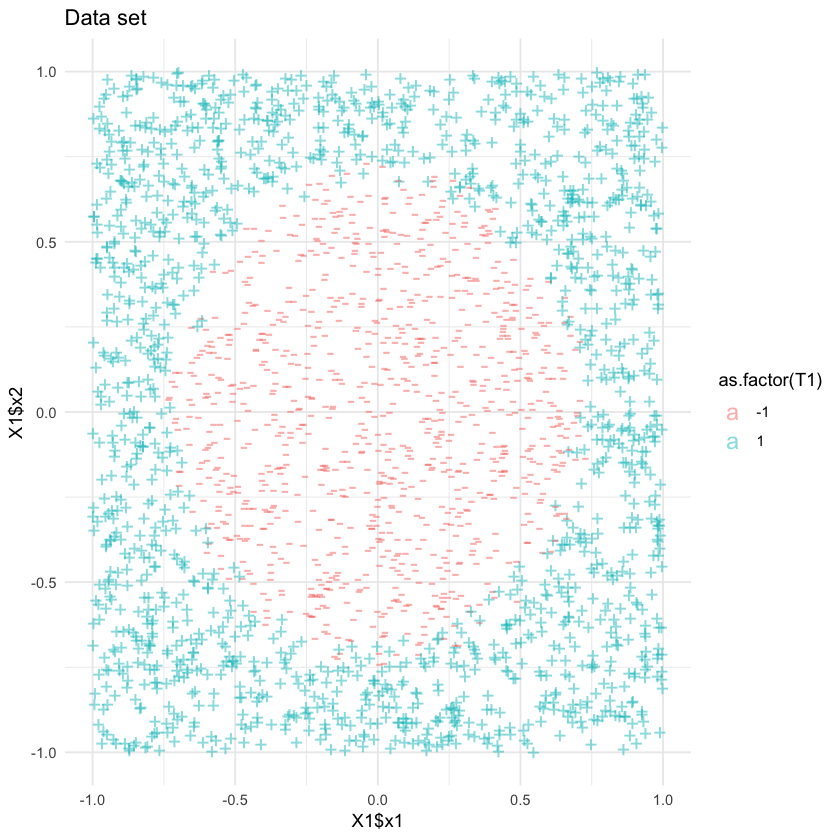

In [5]:
ggplot(data=X1, aes(x=X1$x1, y=X1$x2, color=as.factor(T1), label=ifelse(T1==c0, '+', '-'))) + 
    geom_text(size = 5, alpha=0.5) +
    ggtitle ('Train Dataset') + theme_minimal()


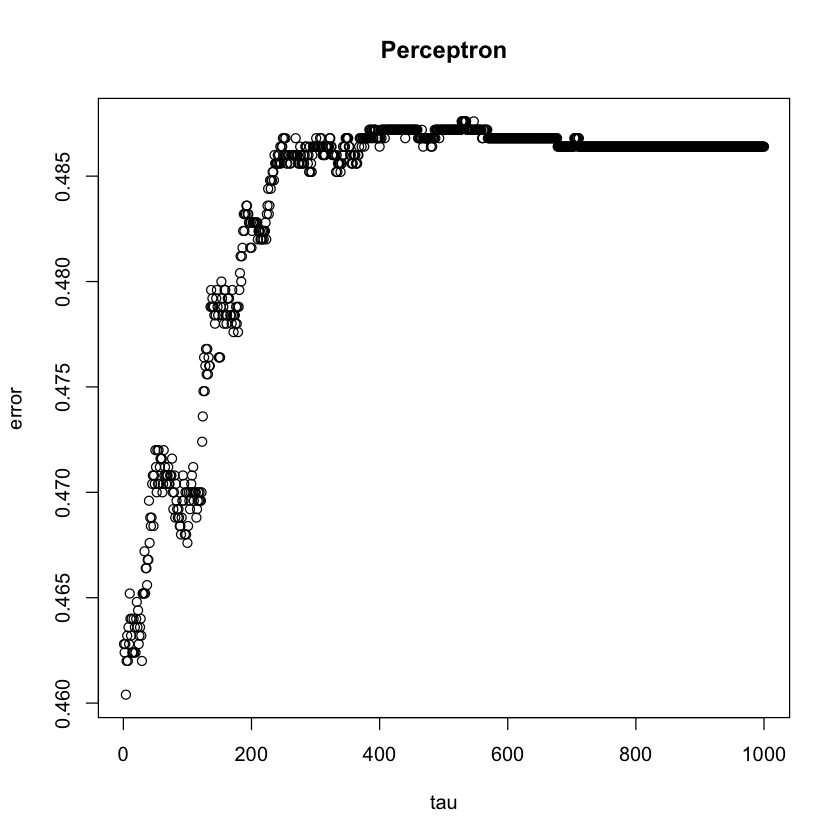

In [21]:
#? Evaluate Perceptron (TO BE COMPLETE)
## Hint: compute Phi, predict the test labels based on the model from the above statements, and then compare the predicted labels with the real labels
W<-perceptron.build(X1, T1, tau.max = 1000, plotting = TRUE)

### Plotting the Training Data and the Perception Decision Boundary

The graph below shows the training data set. I used `+` and `-` symbols to indicate the true class labels. I used colors to indicate the predicted label with red being a wrong prediction and cyan to be a correct prediction. 

Since the dataset seems to be a circle with a radius of 0.75 units and the origin at (0,0), the decision boundary is any line that comes really close, if not actually traversing the origin. Upon running the algorithm multiple times, the decision boundaries with the least errors for this description. 

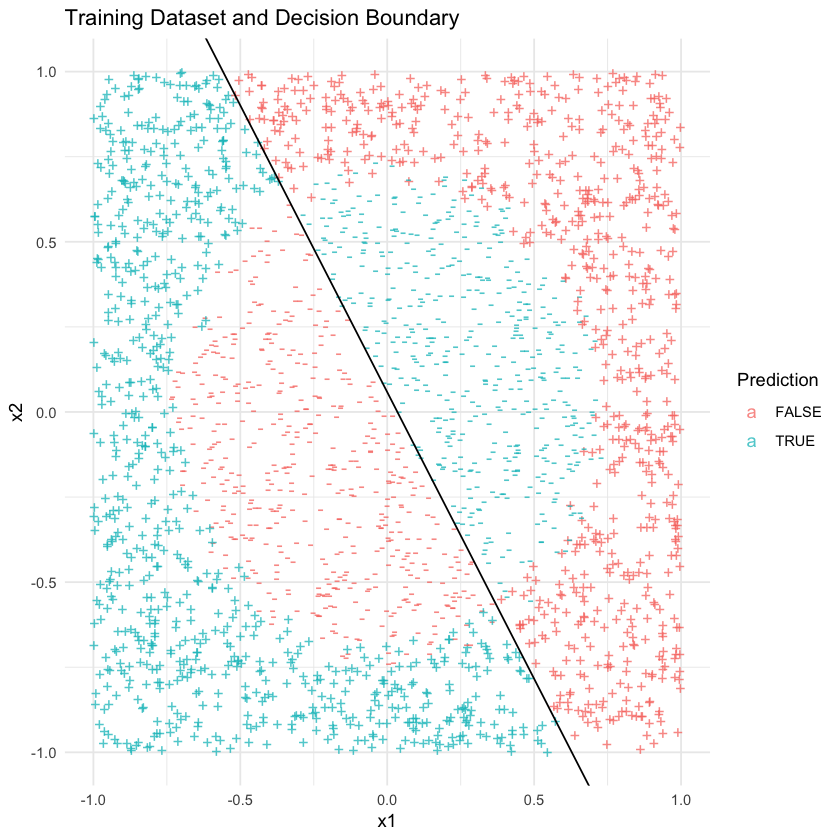

In [183]:
Phi <- as.matrix(cbind(1, X1)) # add a column of 1 as phi_0

ggplot(data=as.data.frame(Phi), aes(x=x1, y=x2, label=ifelse(T1!=c1, '+', '-'), color=factor(Phi%*%W*T1>0))) +
    geom_text(alpha=0.75) +
    scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    geom_abline(intercept=-W[1]/W[3], slope=-W[2]/W[3]) +
    ggtitle('Training Dataset and Decision Boundary') +
    theme_minimal()

### Plotting the Test Data and the Perception Decision Boundary

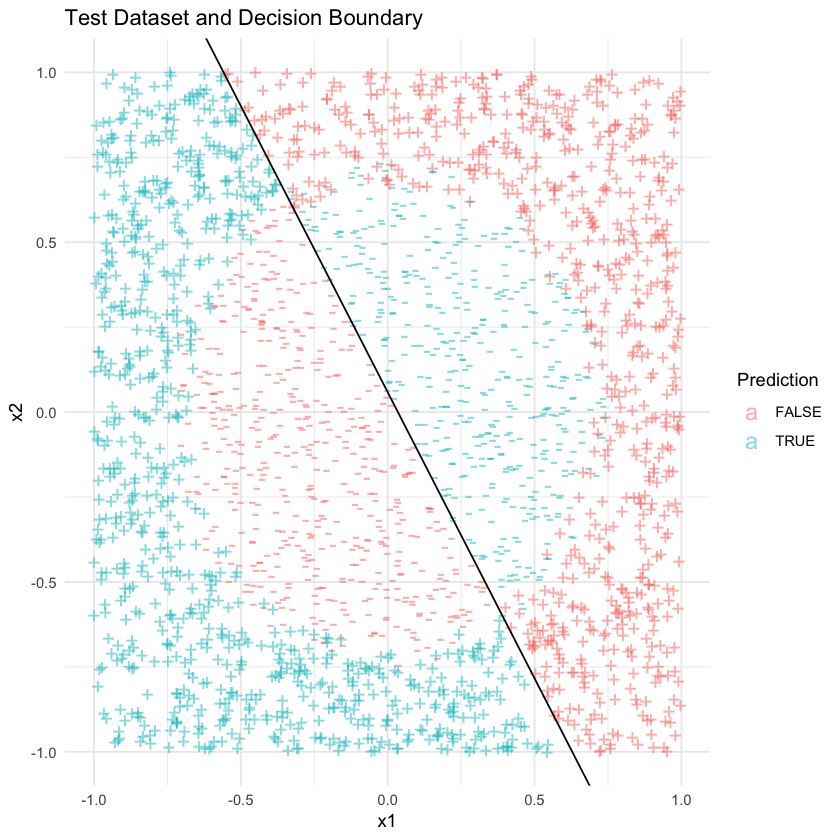

In [184]:
Phi.X2 <- as.matrix(cbind(1, X2))

ggplot(data=as.data.frame(Phi.X2), aes(x=x1, y=x2, label=ifelse(T2!=c1, '+', '-'),color=as.factor(Phi.X2%*%W*T2>0))) + 
    geom_text(size = 5, alpha=0.5) +
    scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    geom_abline(intercept=-W[1]/W[3], slope=-W[2]/W[3]) +
    ggtitle('Test Dataset and Decision Boundary') +
    theme_minimal()

### Evaluating the model 

After running the algorithm a couple of times, it seems like it converges on a line that traverses the origin at (0,0). This effectively divides the dataset in half and has a misclassification error of 0.4864 and 0.4832 for the training and testing set respectively. Both errors are very close to 0.50, which means half of the data set are properly identified.

In [177]:
train.predict <- perceptron.predict(Phi, W)
train.error <- error.rate(train.predict, T1)
train.error

[1] 0.4864

In [178]:
test.predict <- perceptron.predict(Phi.X2, W)
test.error <- error.rate(test.predict, T2)
test.error

[1] 0.4832

## Neural Network

A better way to learn the non-linear boundary is through a 3-Layer Neural Network. It is said that a neural network, with the proper configuration, can learn virtually all models. It is no surprise that this simple 3-layer neural network performed significantly better than the perceptrion. For my run, the most optimum number of neurons (from 2 to 100) is 74. It produced the least misclassification error at 0.0864. 

In [115]:
####################### NEURAL NET ####################### 
## the activation function (tanh here)
h <- function(z, a=1) { #activation function (sigmoid here)
  return ((exp(z)-a^(-z))/(exp(z)+exp(-z)))
}
## the derivitive of the activation function (tanh here)
h.d <- function(z, a=1) {
  return (1-(h(z, a))^2)
}
## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}
## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}
## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}
## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))
}
## NN build function
nn.build <- function(K, X1, T1, plotting=FALSE, epoch.max=50, eta = 0.1, lambda = 0.01){
  # initialization
  if (plotting) {error.rec <- matrix(NA,nrow=epoch.max, ncol=1)}
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
    ## record the errors
    if (plotting){error.rec[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)}
  }
  plot(error.rec, xlab = 'epoch', ylab = 'error', main = 'Neural Net')
  return(list(W1, W2, b1, b2))
}

In [116]:
X1.t <- t(as.matrix(X1))
X2.t <- t(as.matrix(X2))
T1 <- as.matrix(T1)
T2 <- as.matrix(T2)

# Get a 10% sample for debugging
#sample_indx <- sample(ncol(X1.t),250)
#X1.t.subset <- X1.t[,sample_indx]
#T1.subset <- T1[sample_indx,]
#X2.t.subset <- X2.t[,sample_indx]
#T2.subset <- T2[sample_indx,]

### Build a number of Neural Networks with different number of units in the hidden layer



#### epoch.max=1000, seq(2, 100, 2)

Lowest test error is for k=74, train.error=0.0780, test.error=0.0864

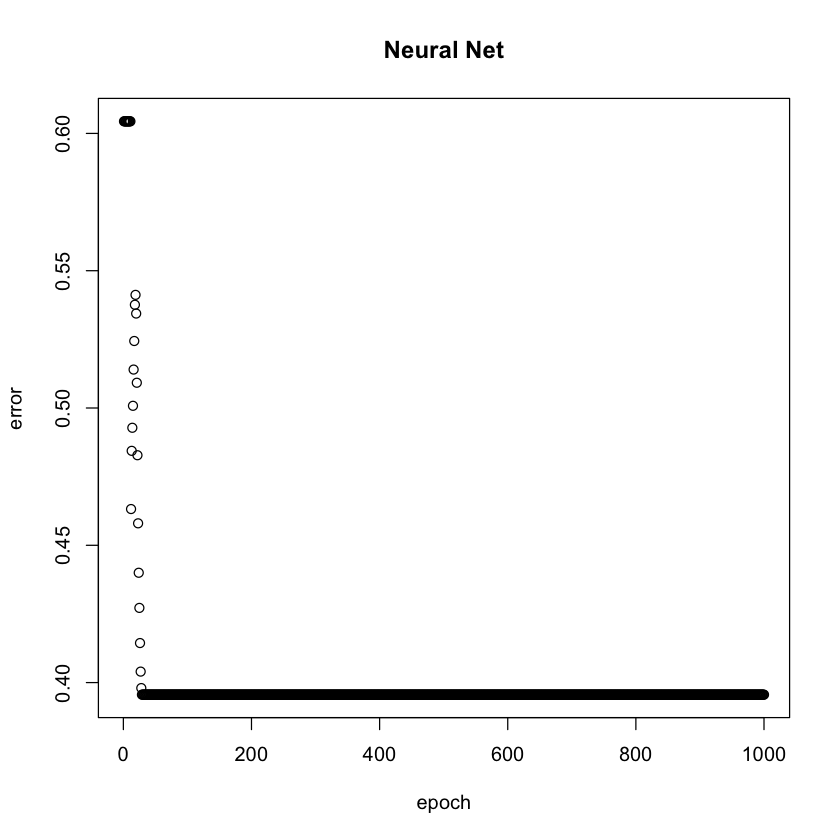

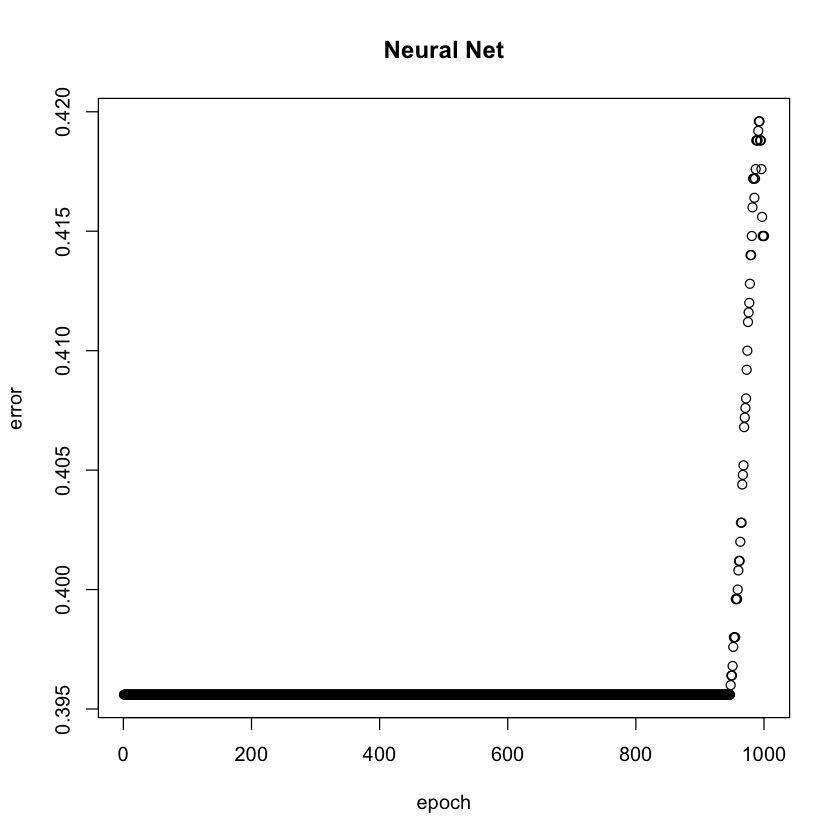

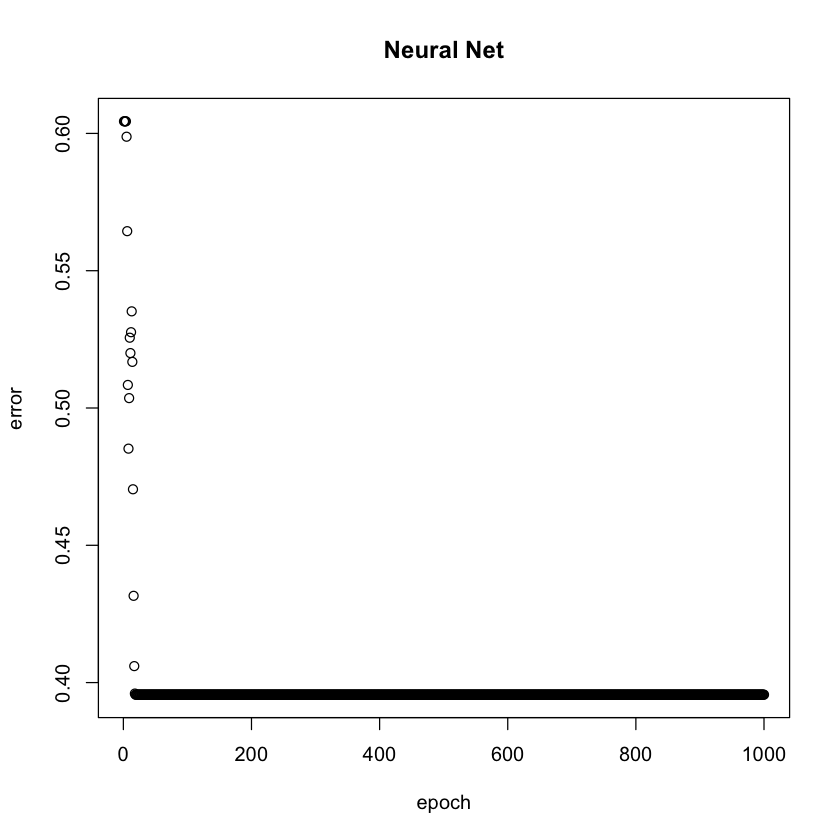

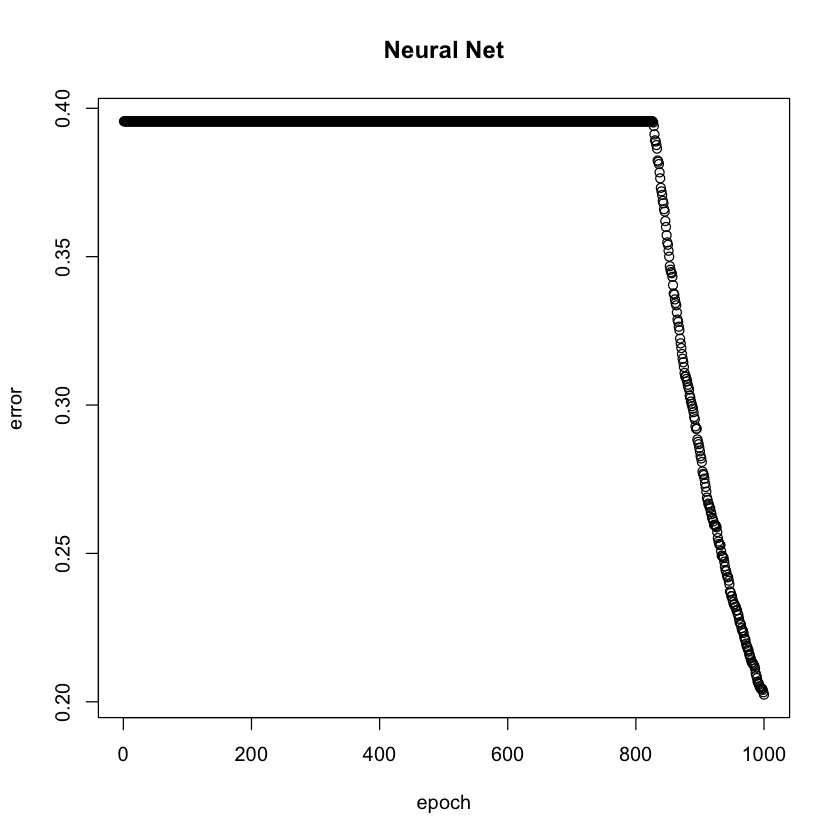

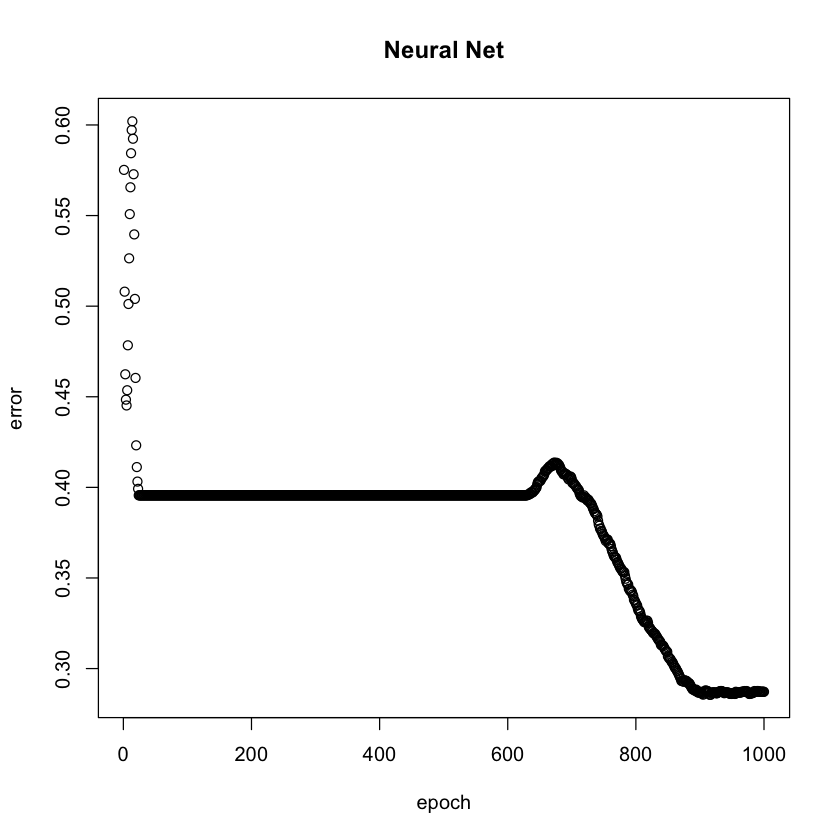

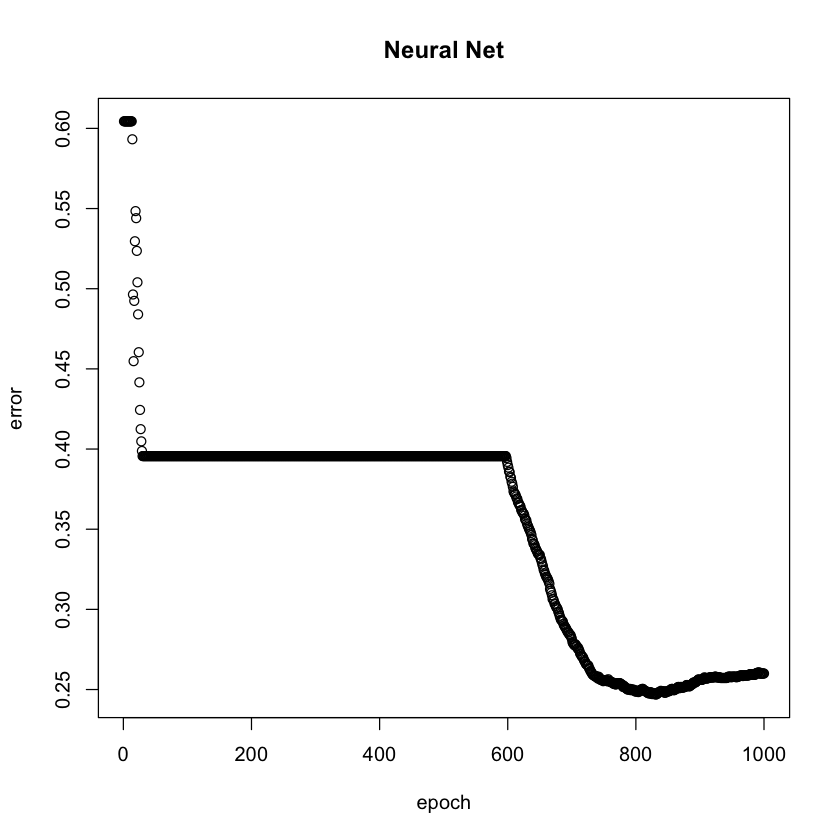

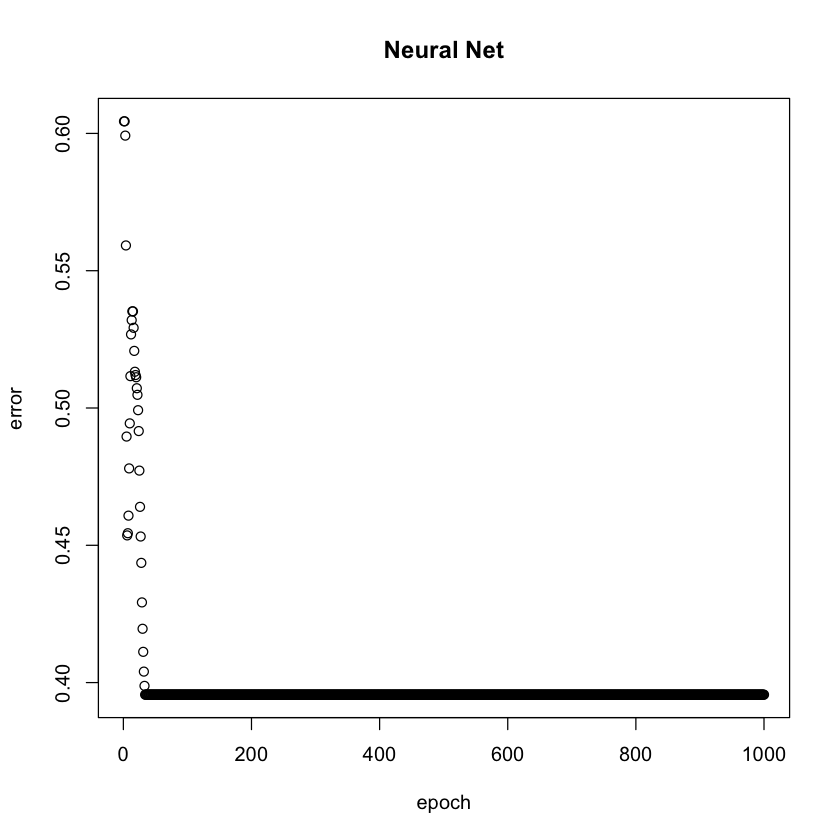

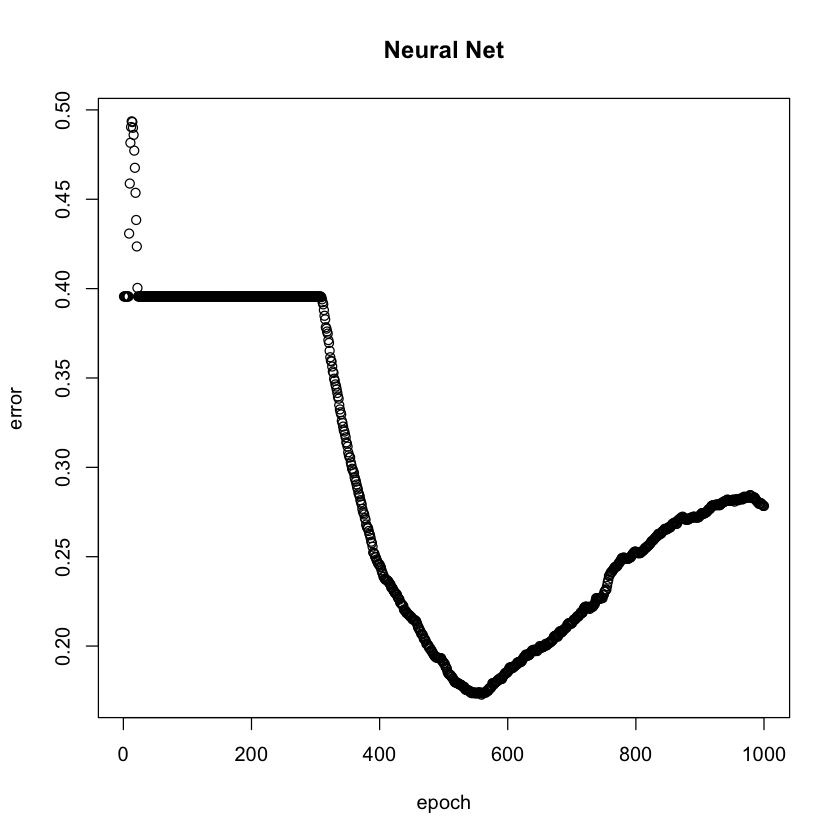

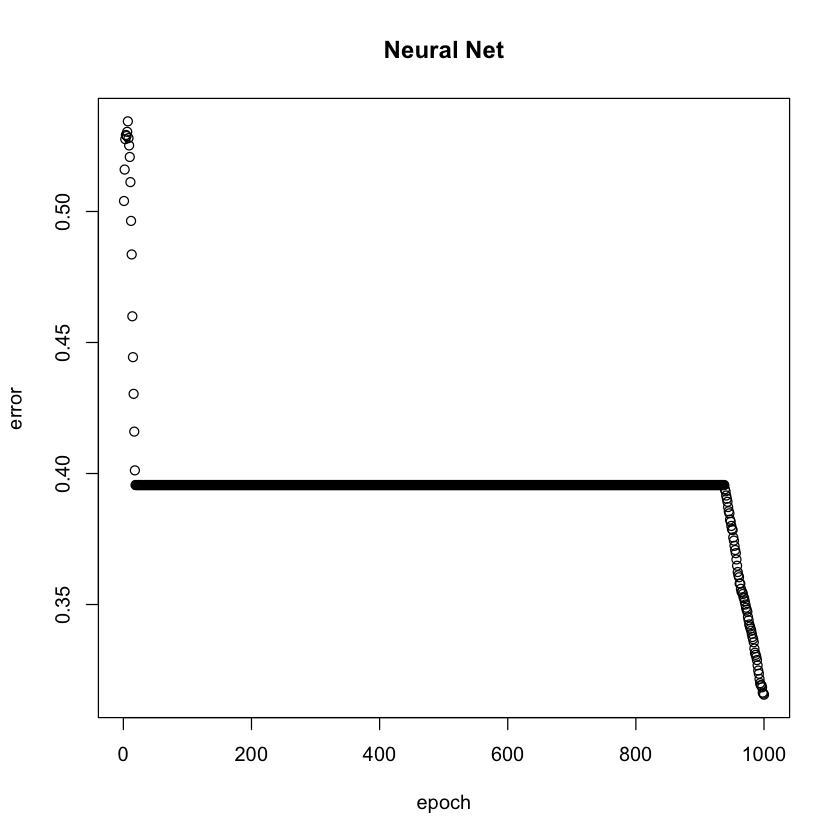

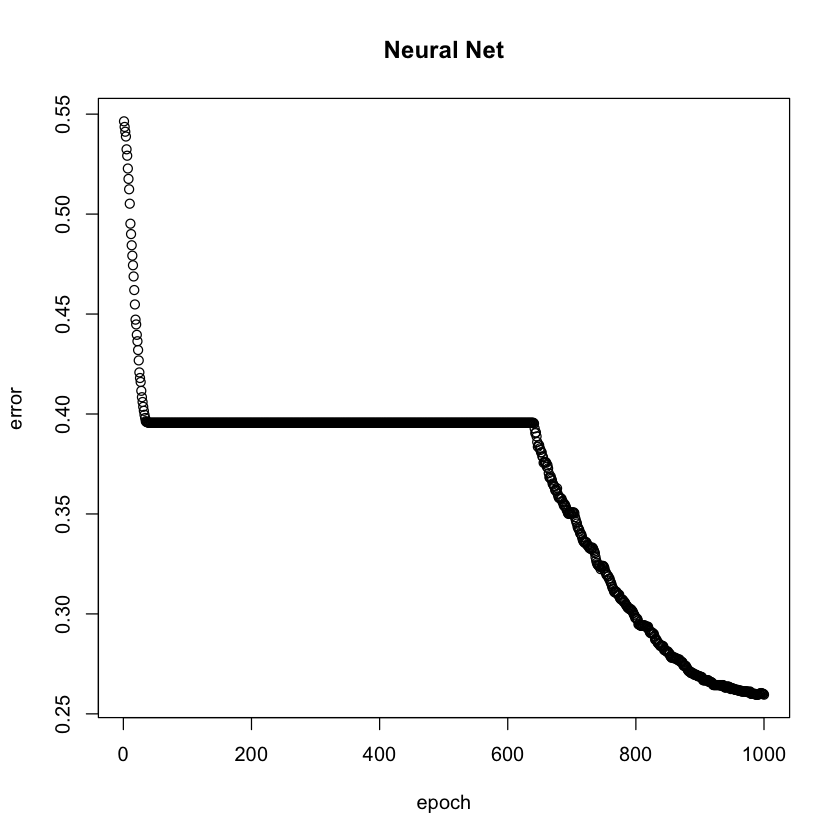

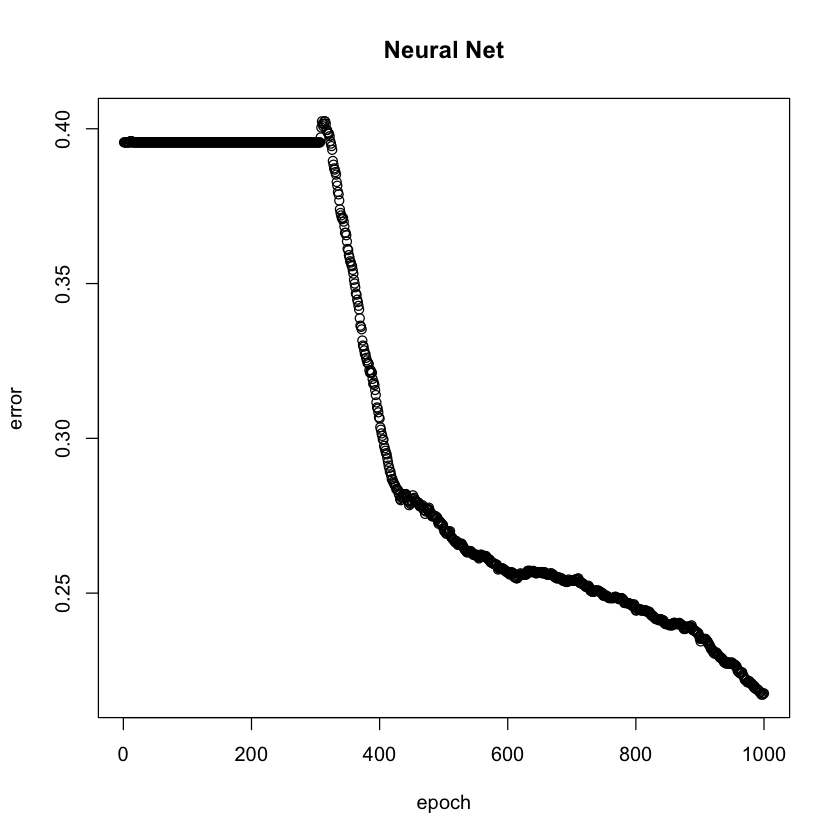

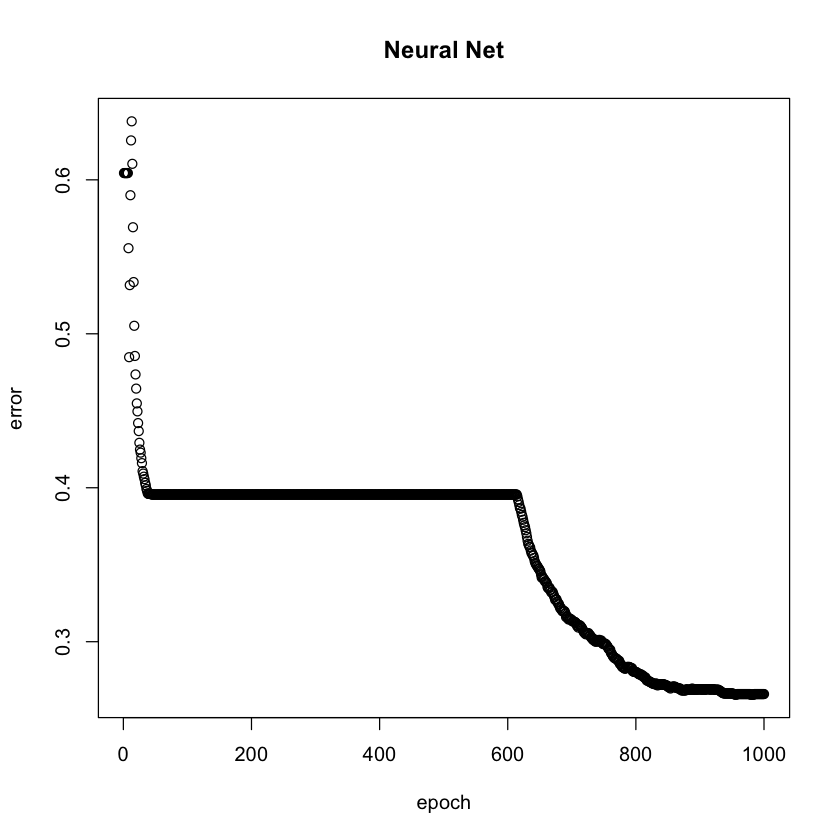

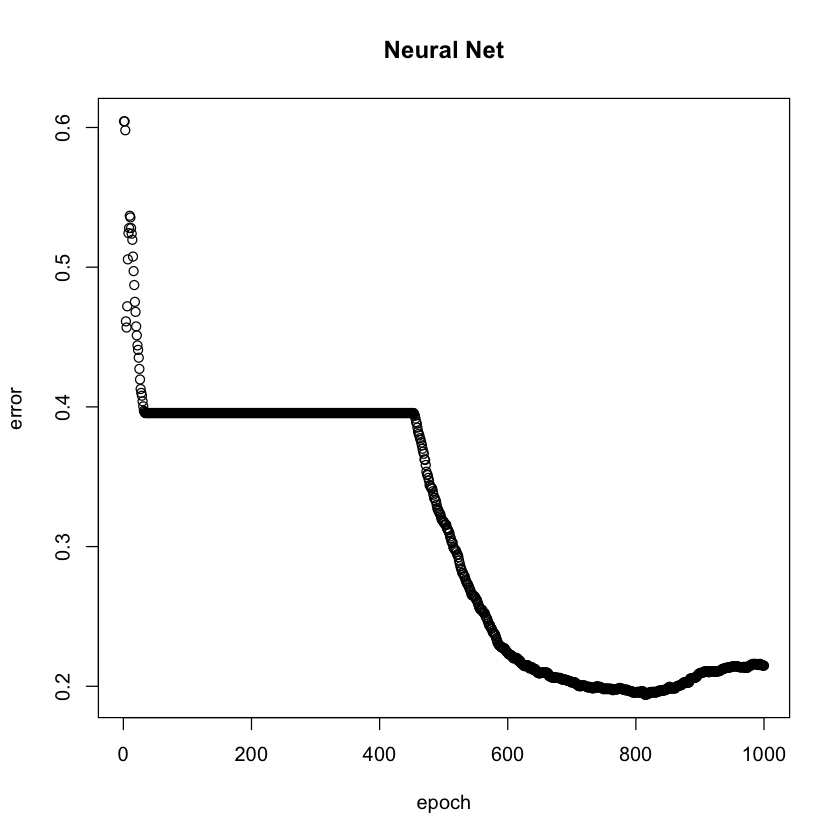

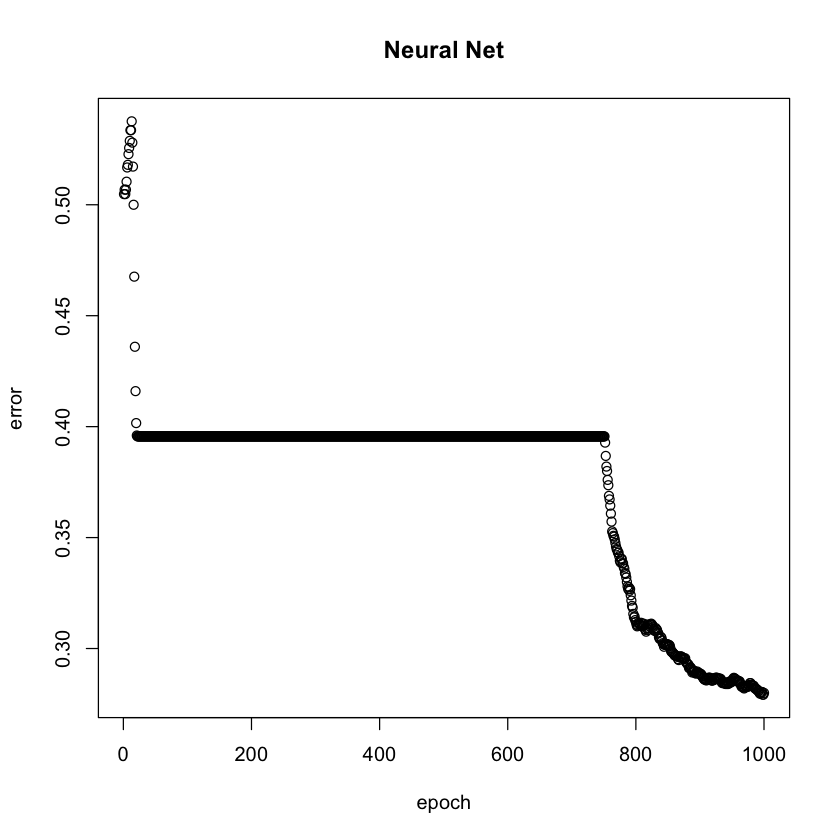

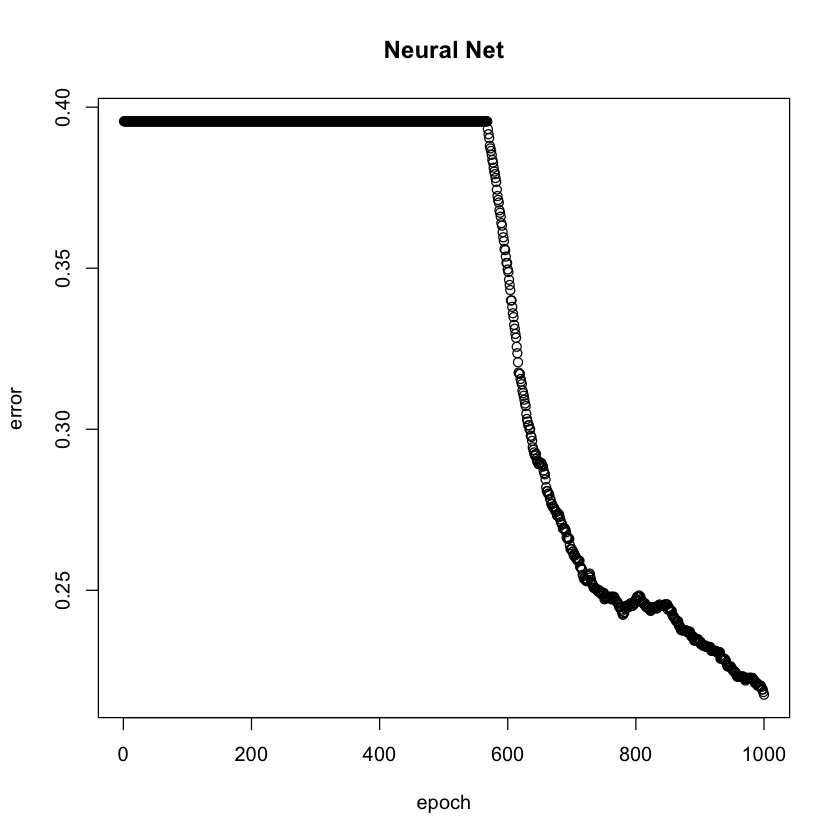

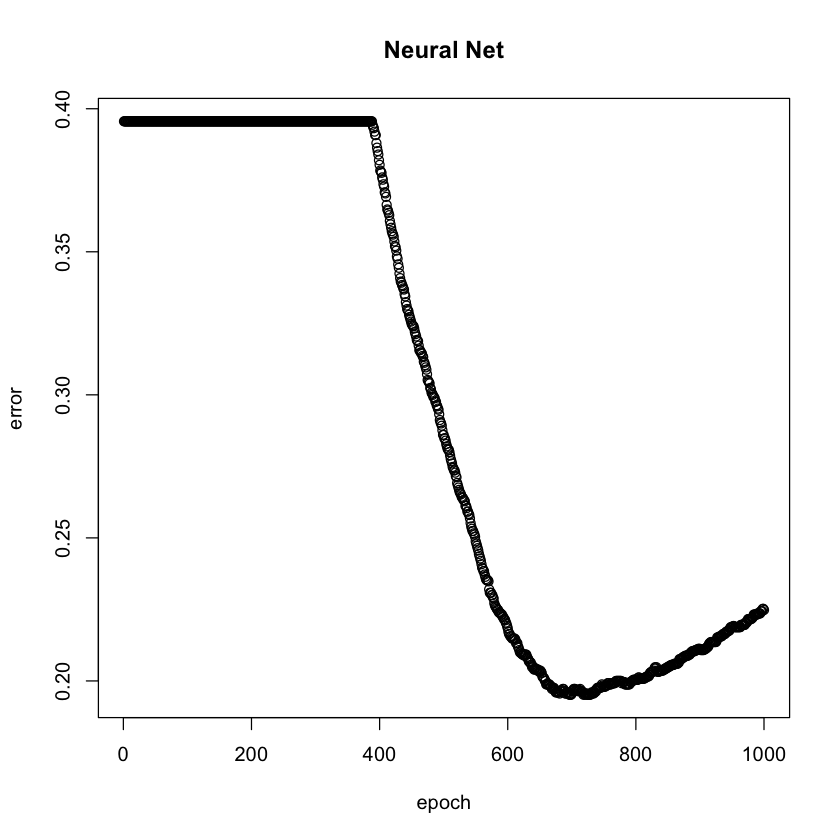

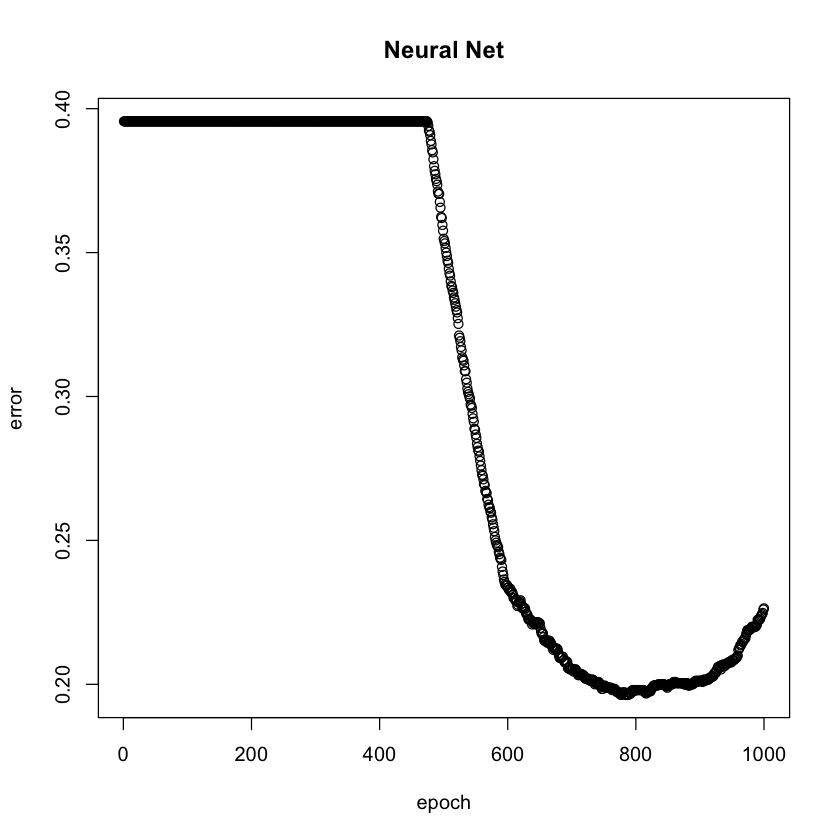

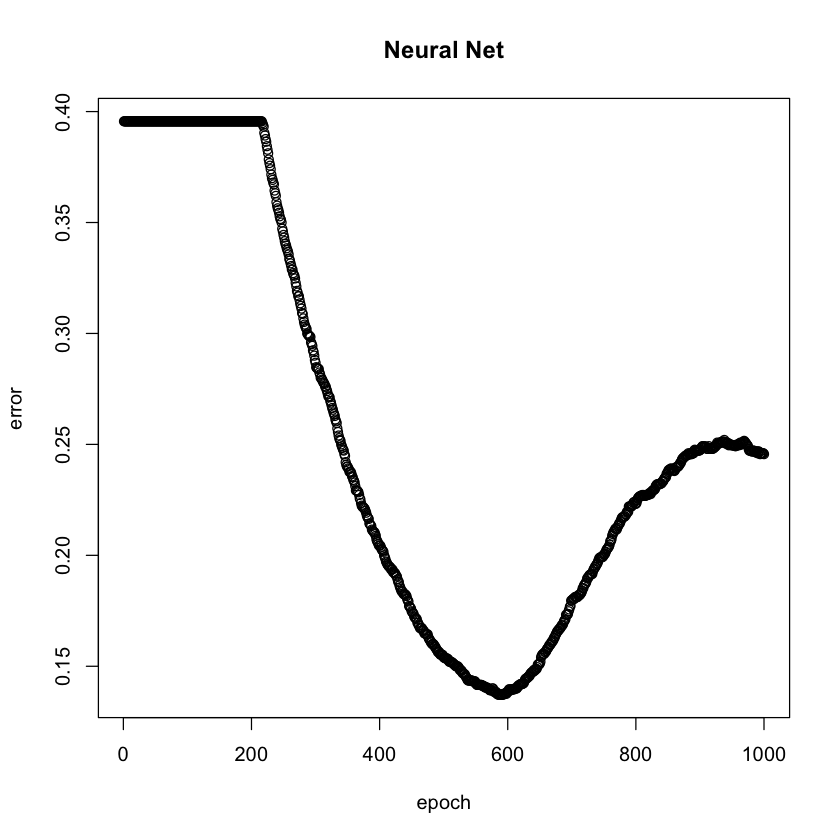

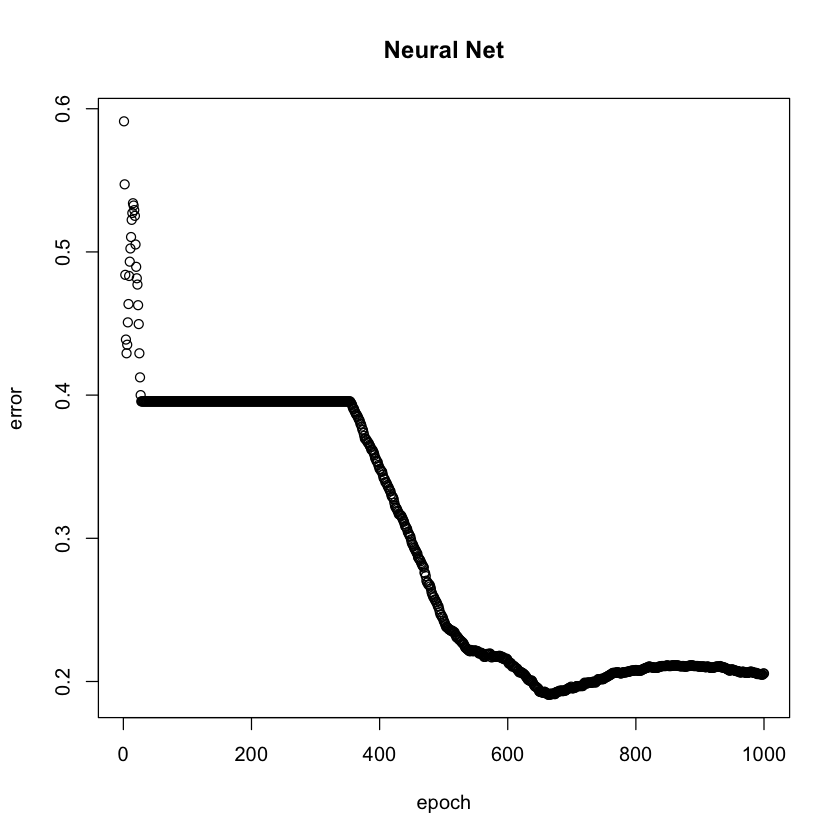

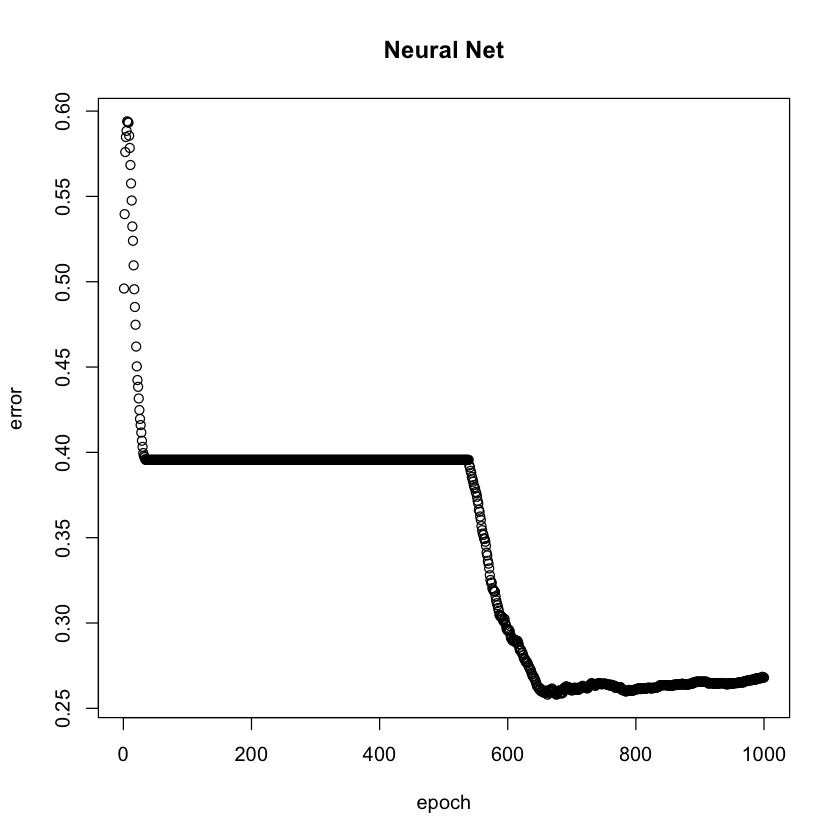

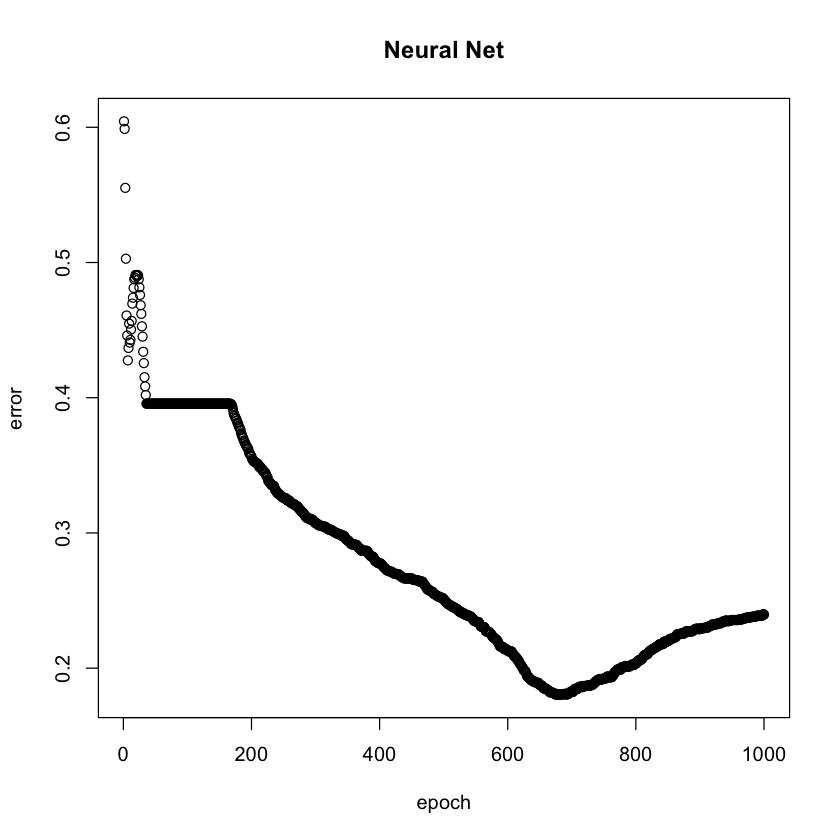

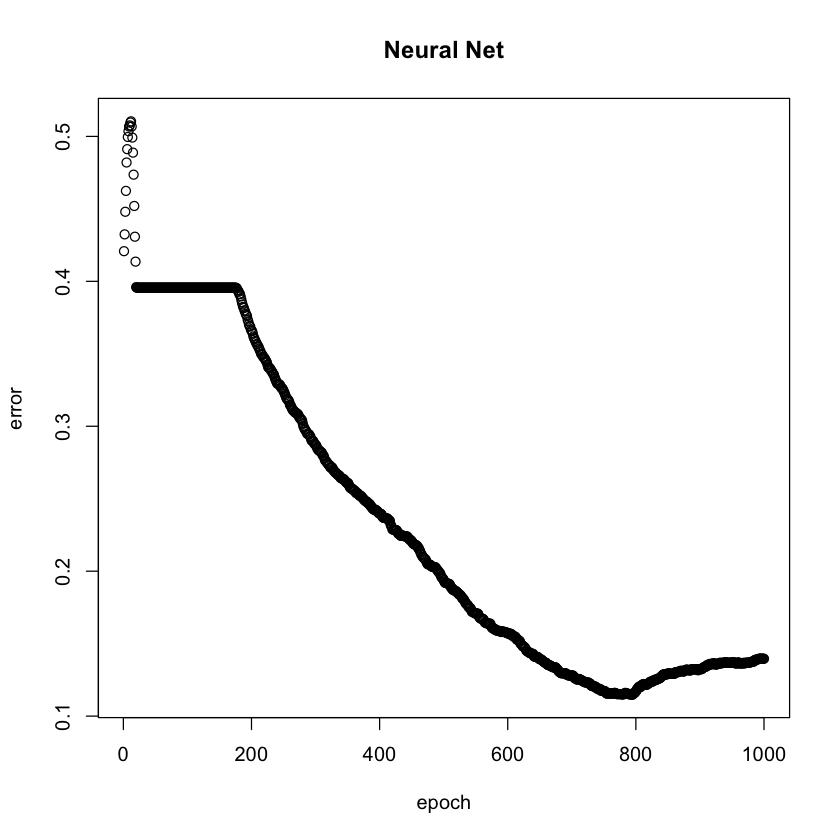

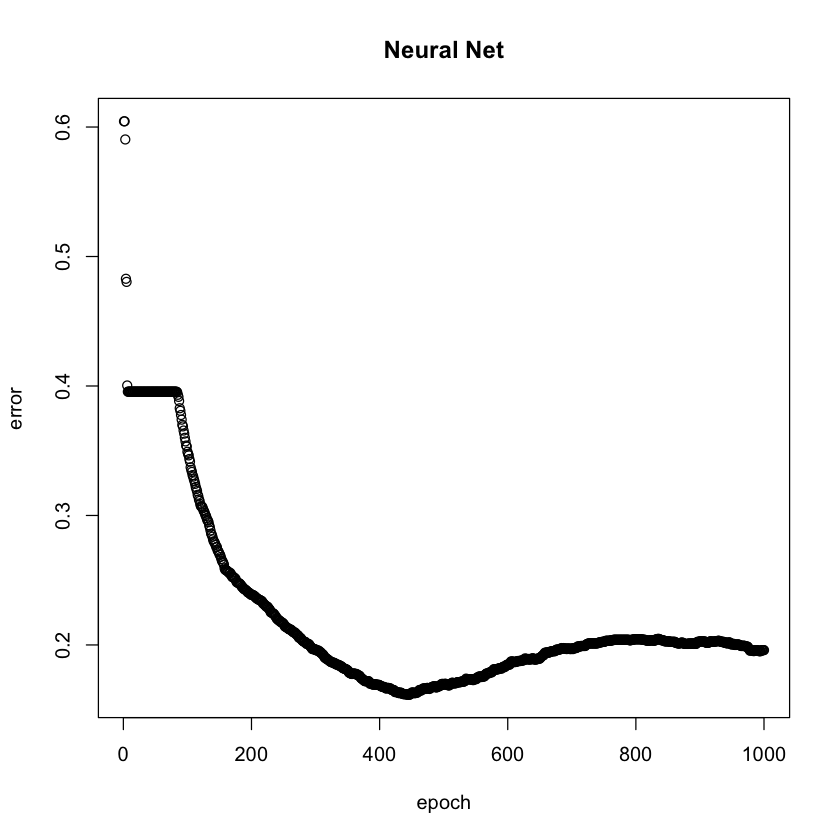

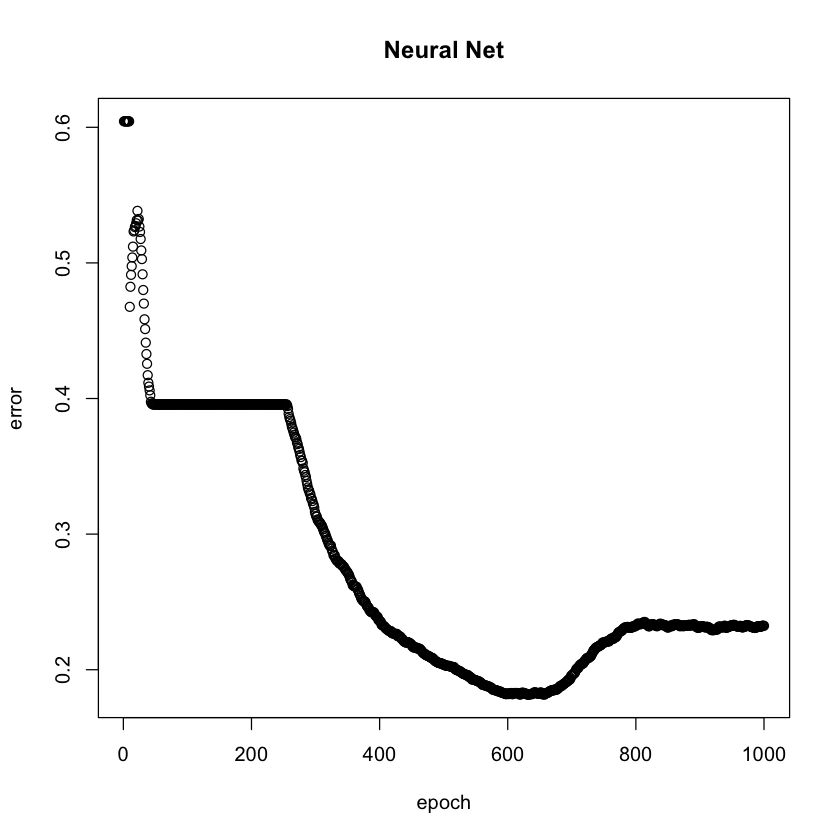

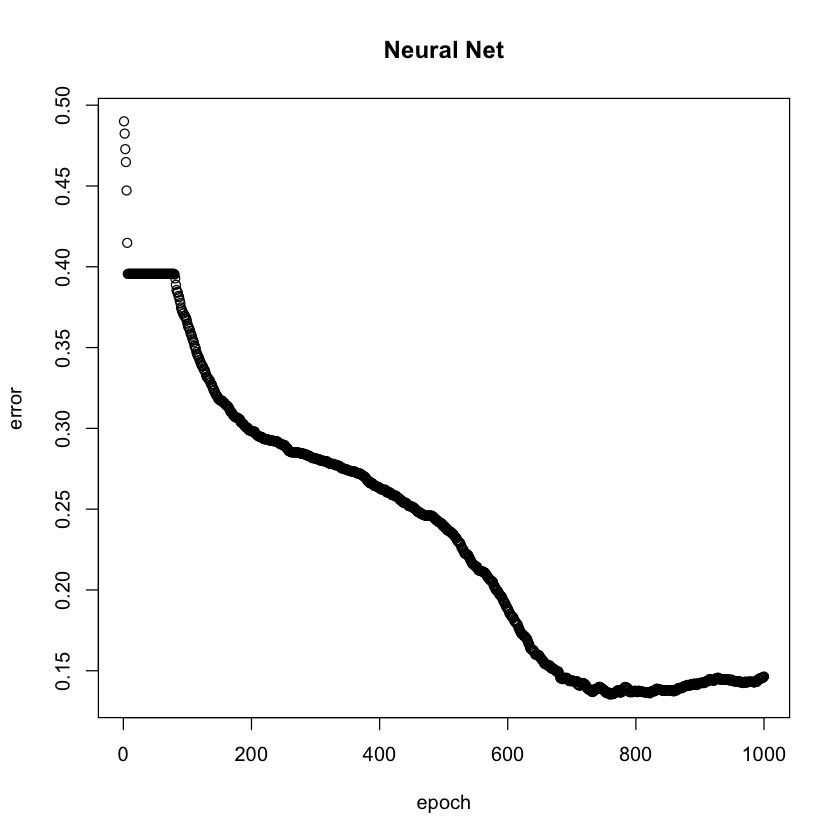

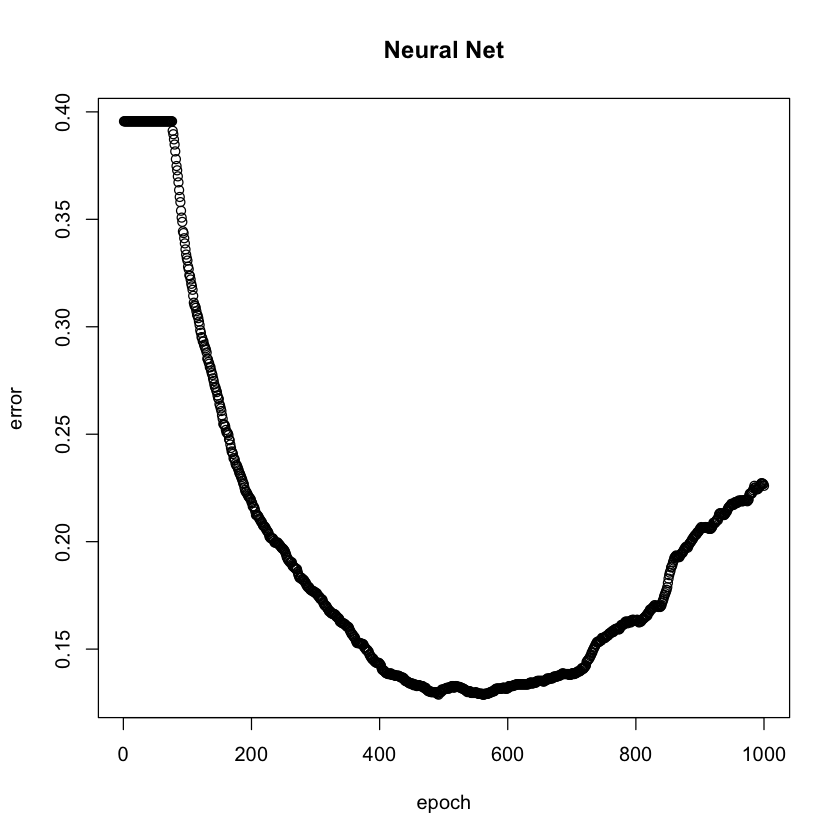

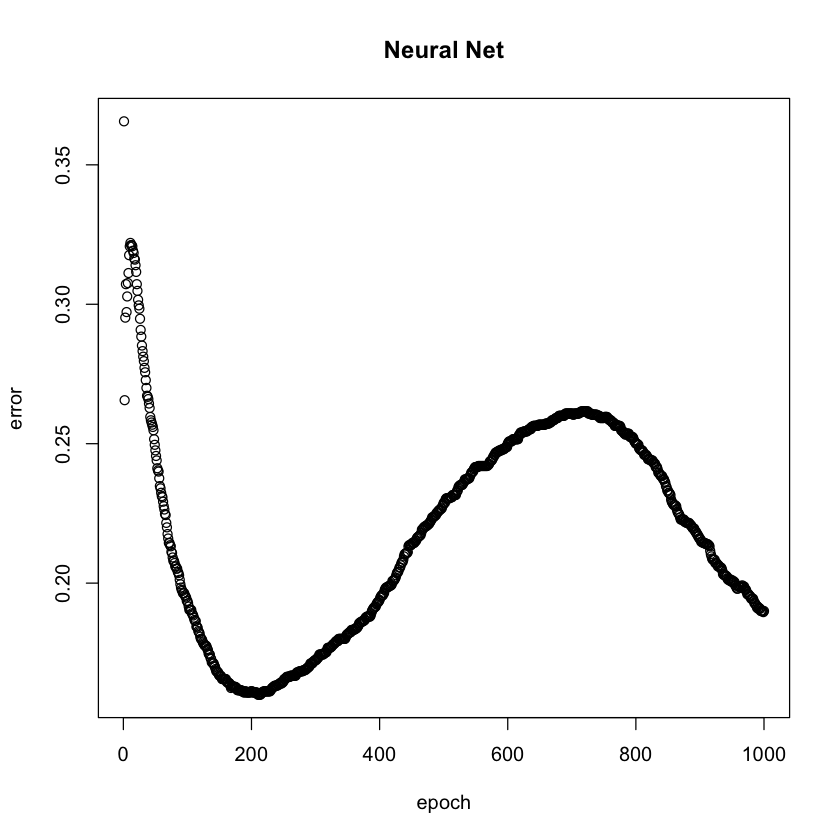

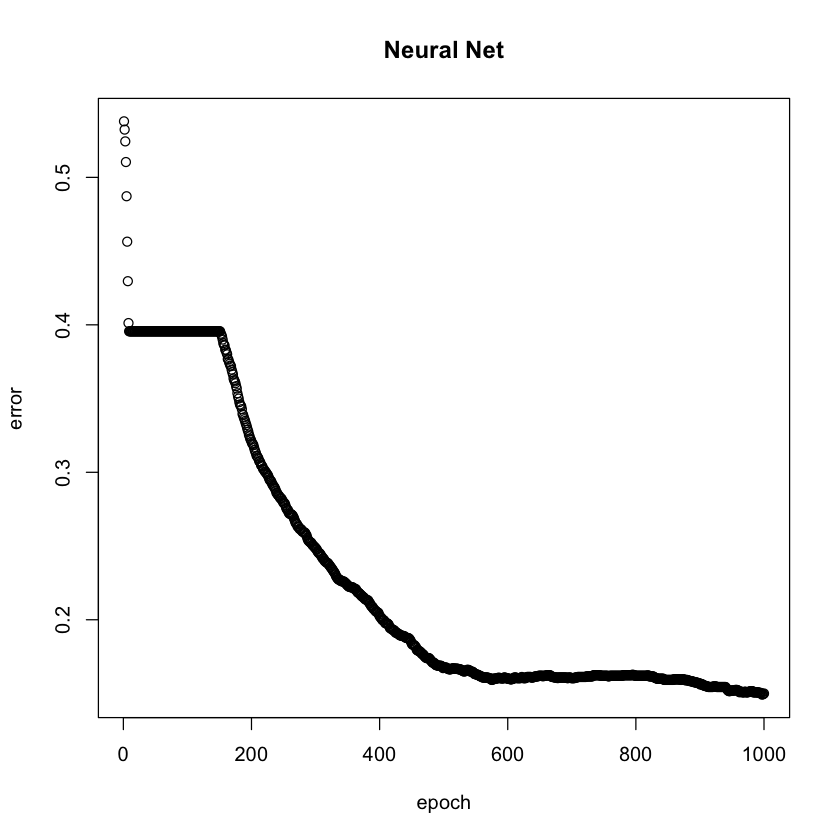

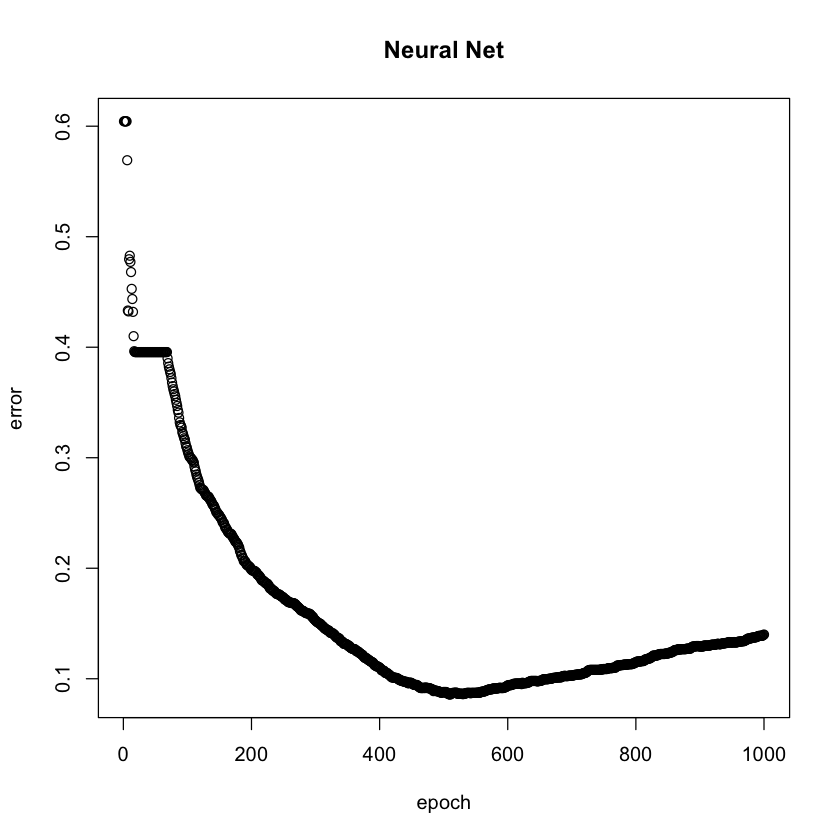

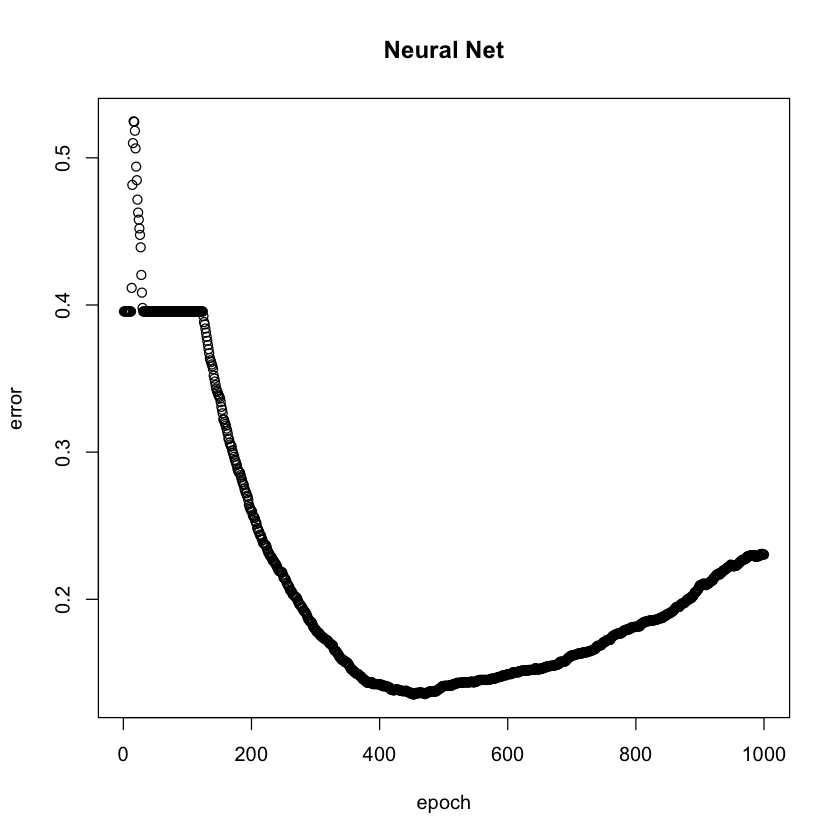

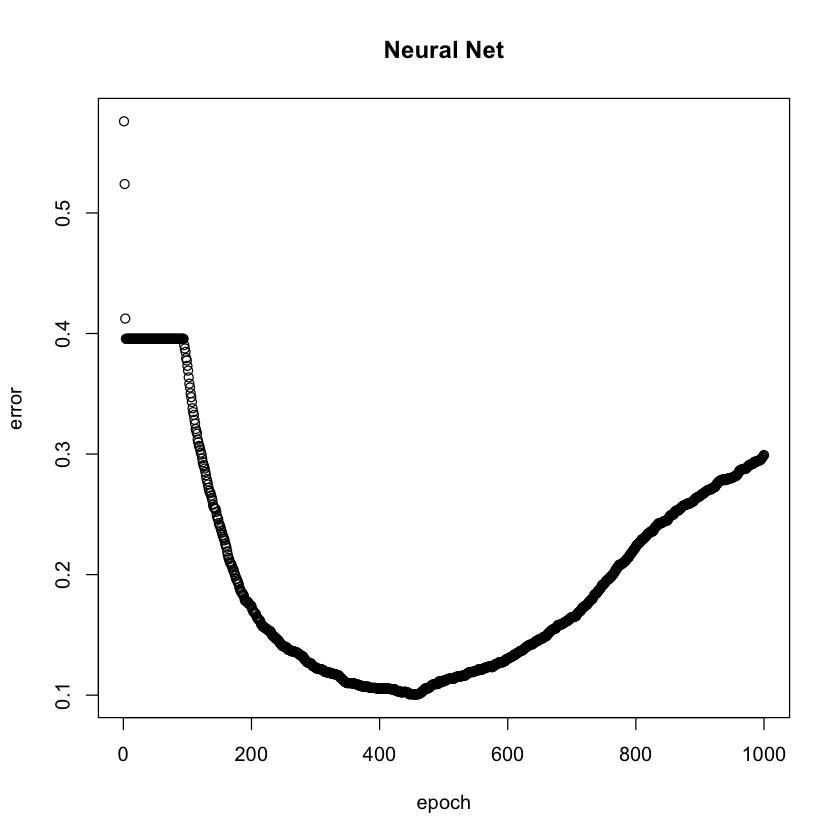

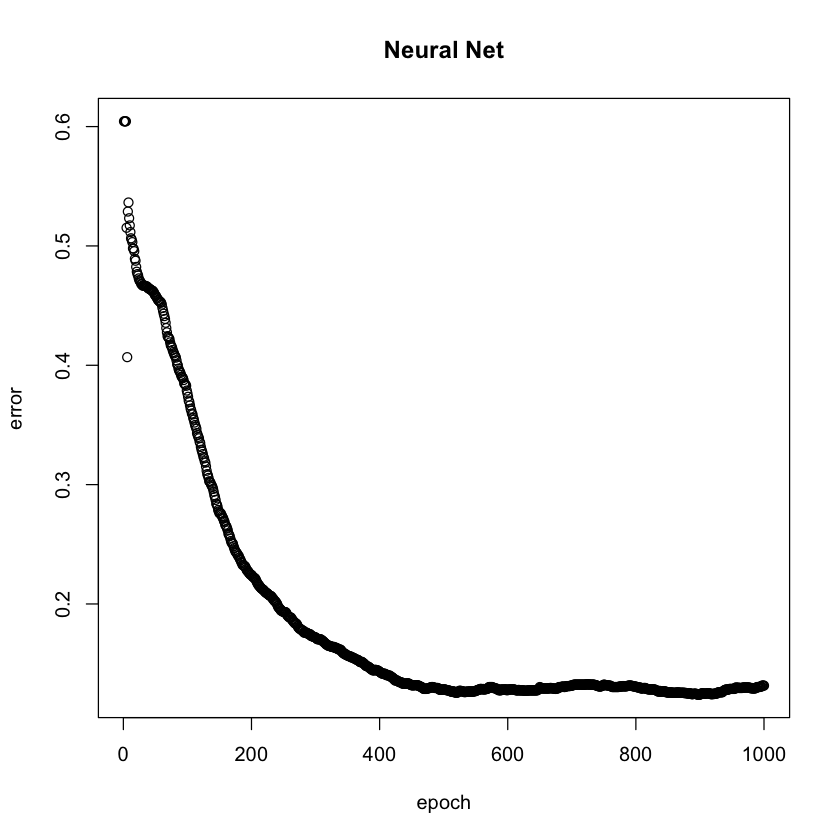

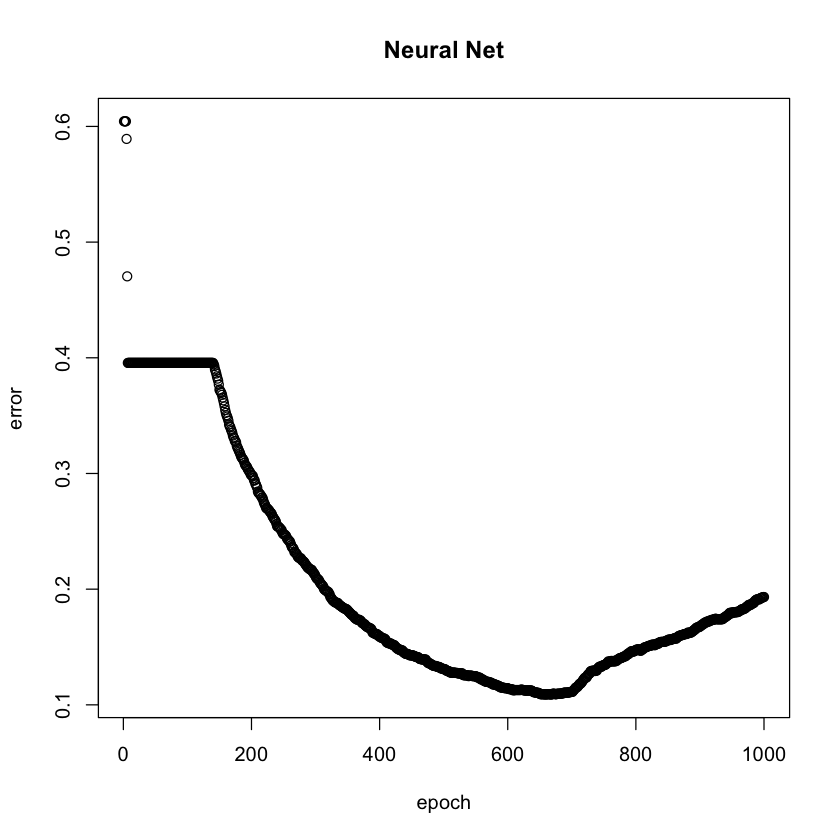

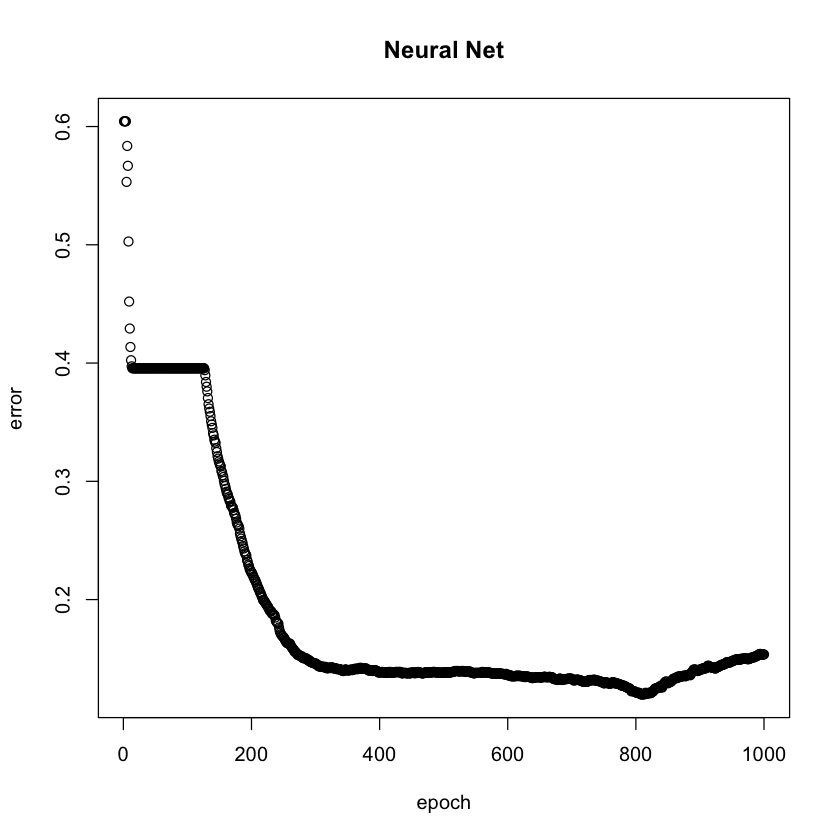

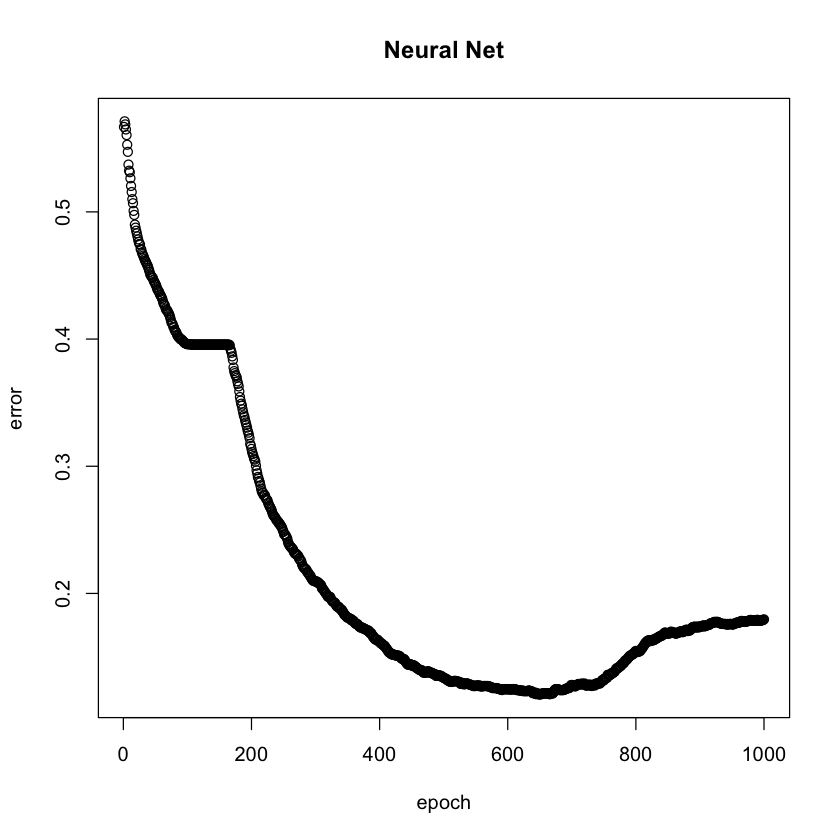

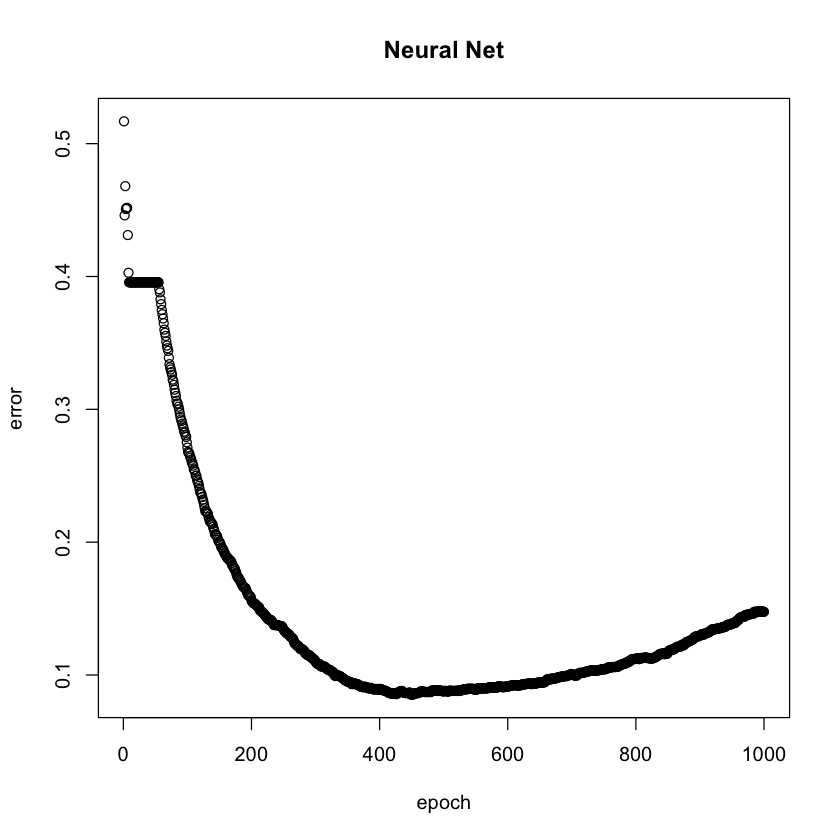

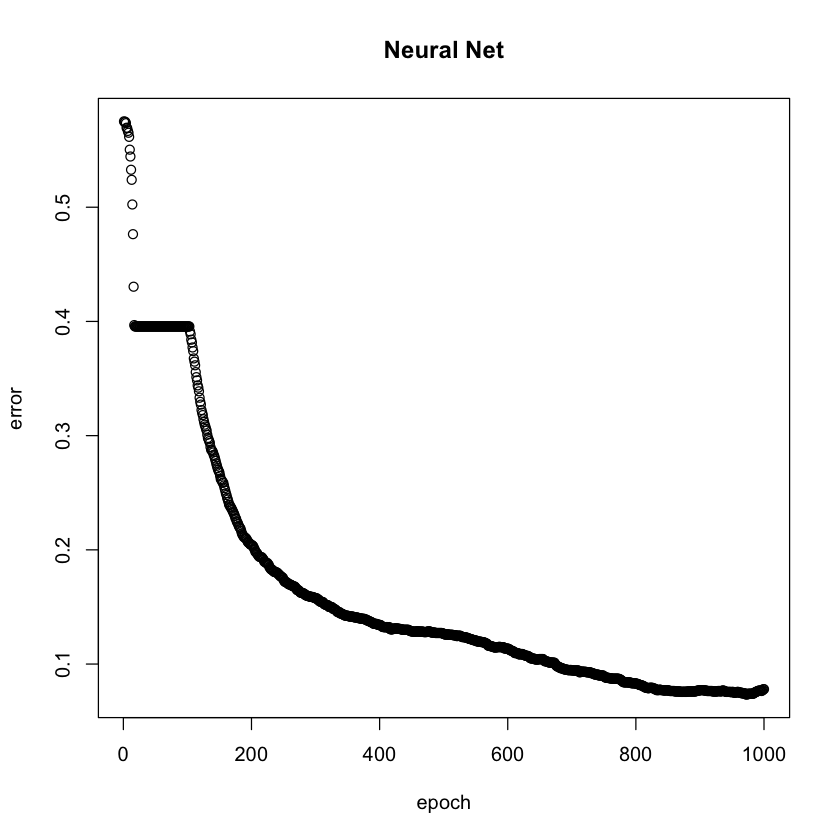

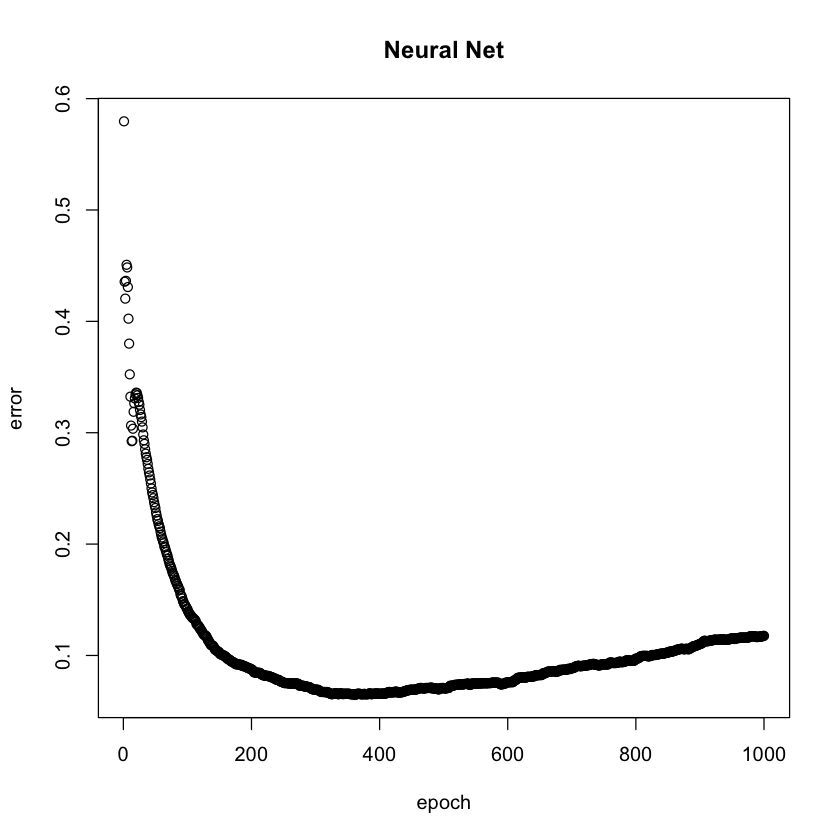

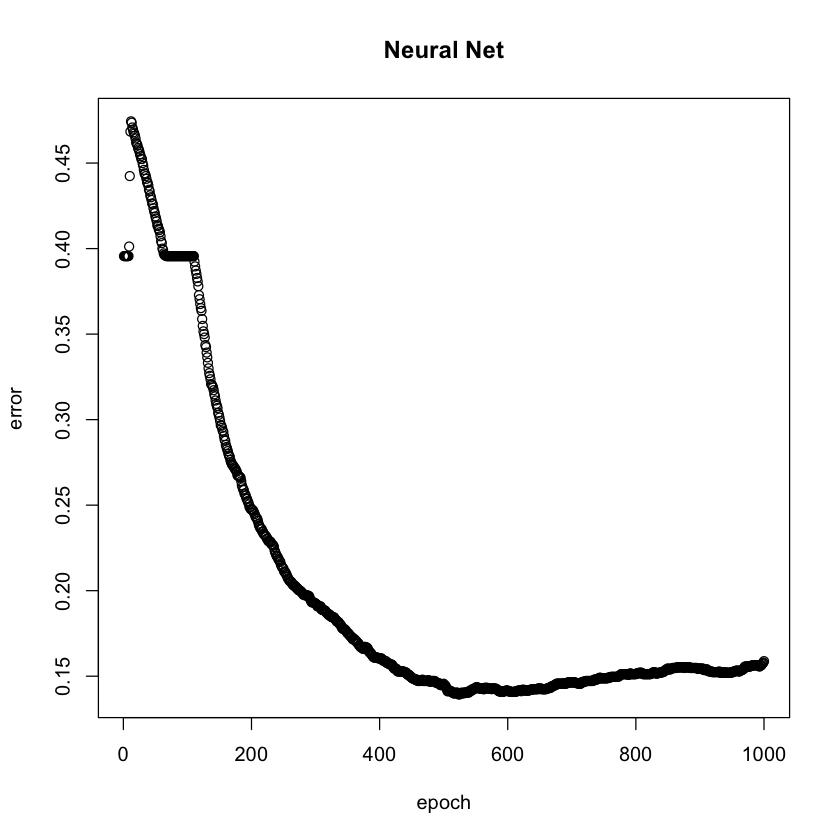

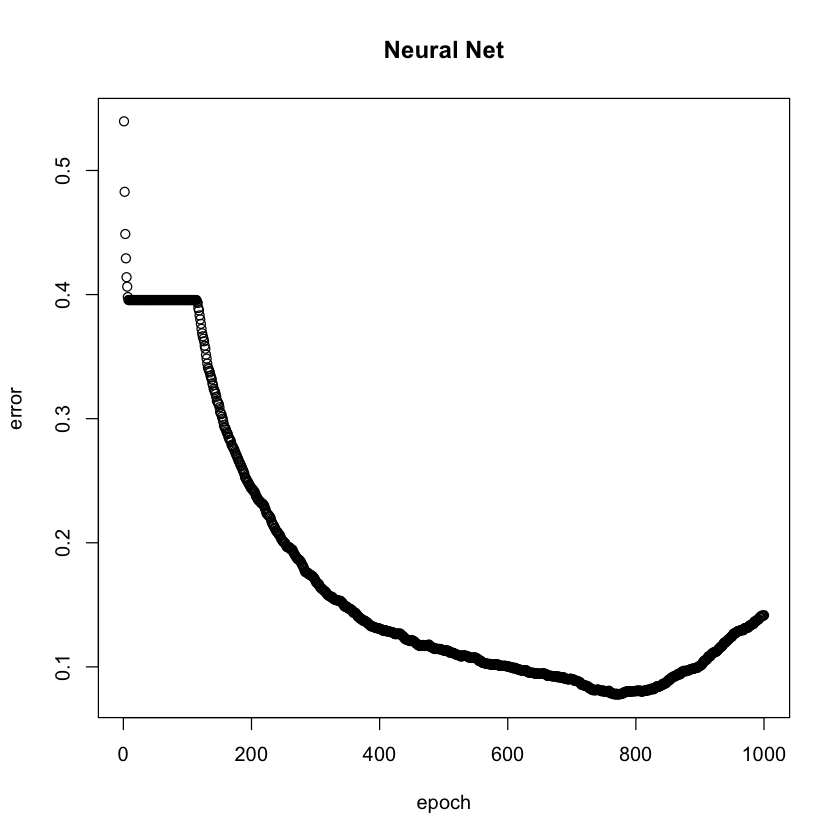

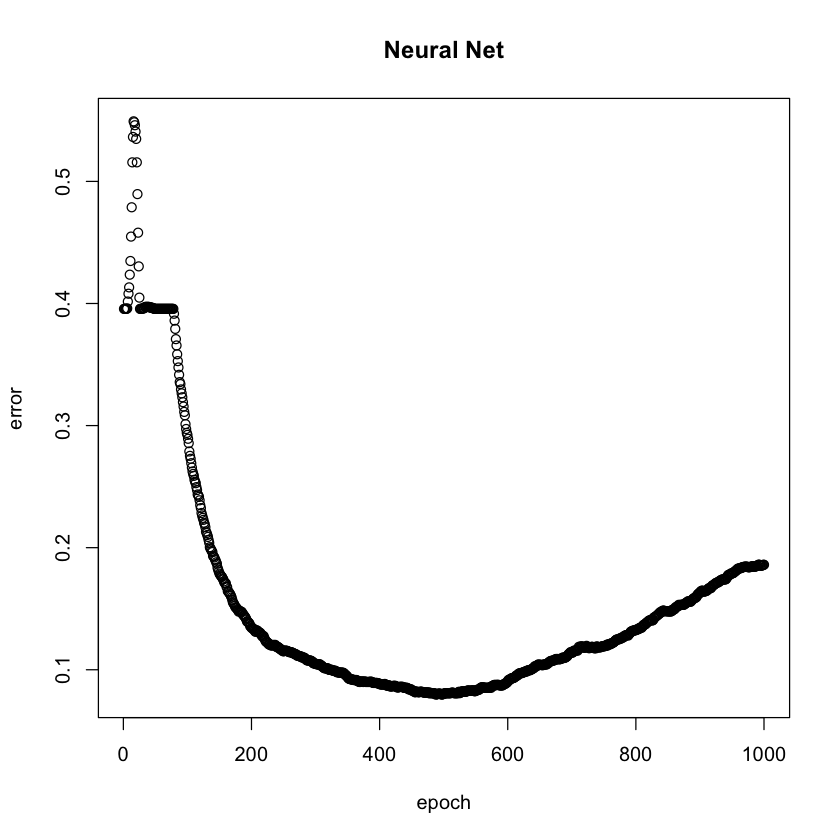

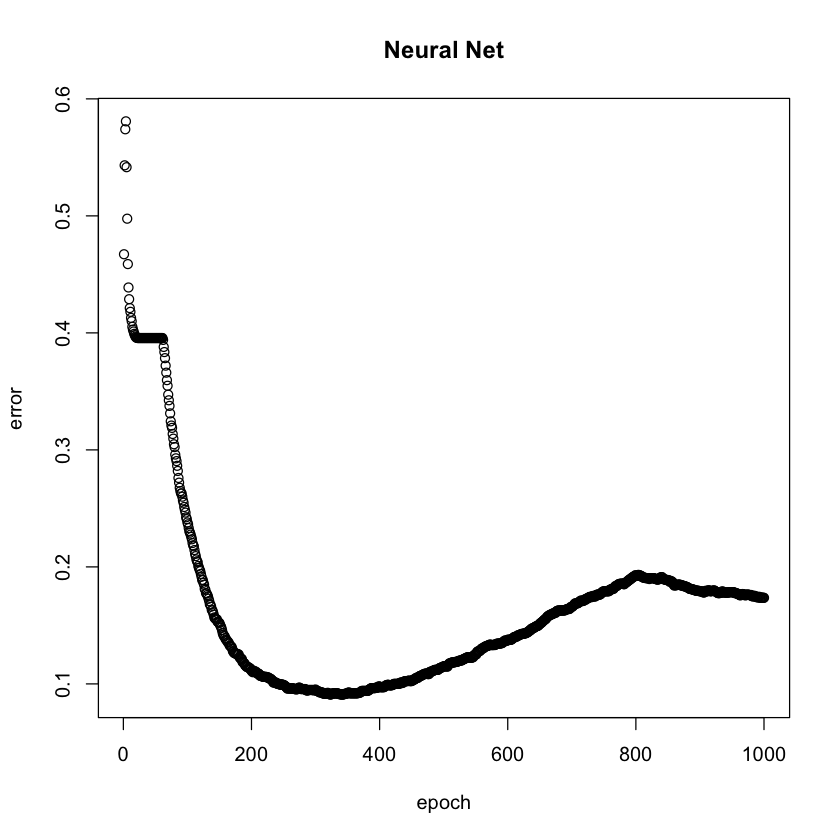

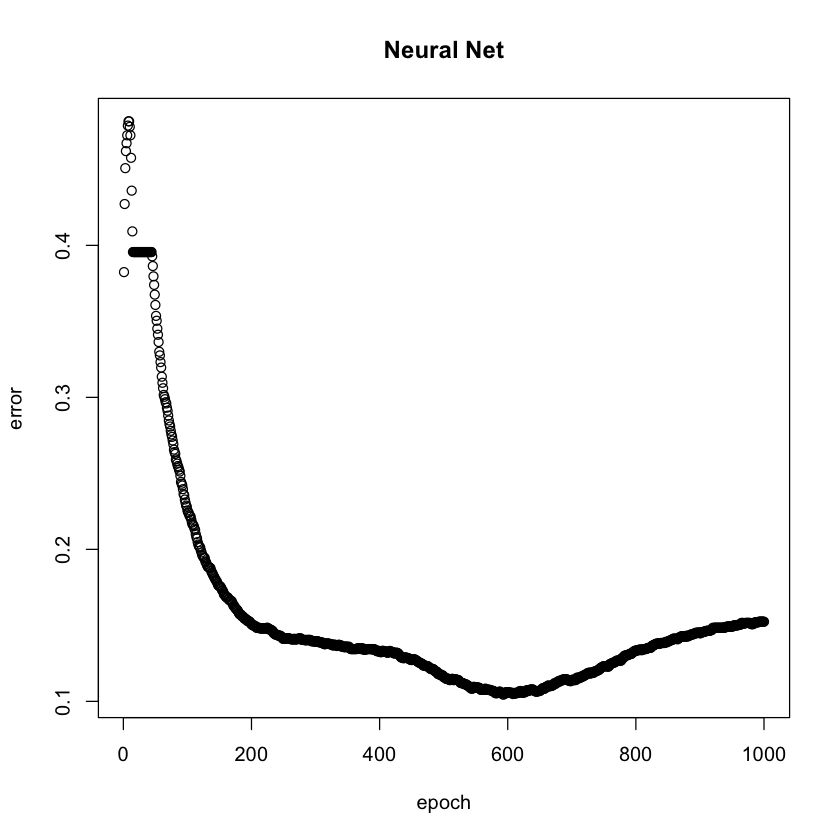

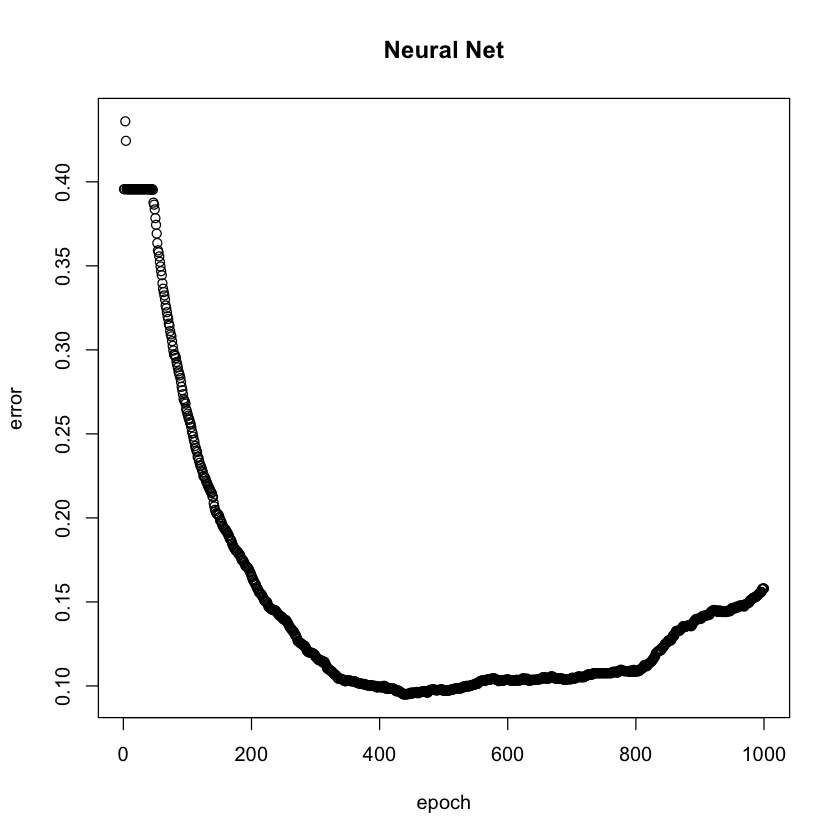

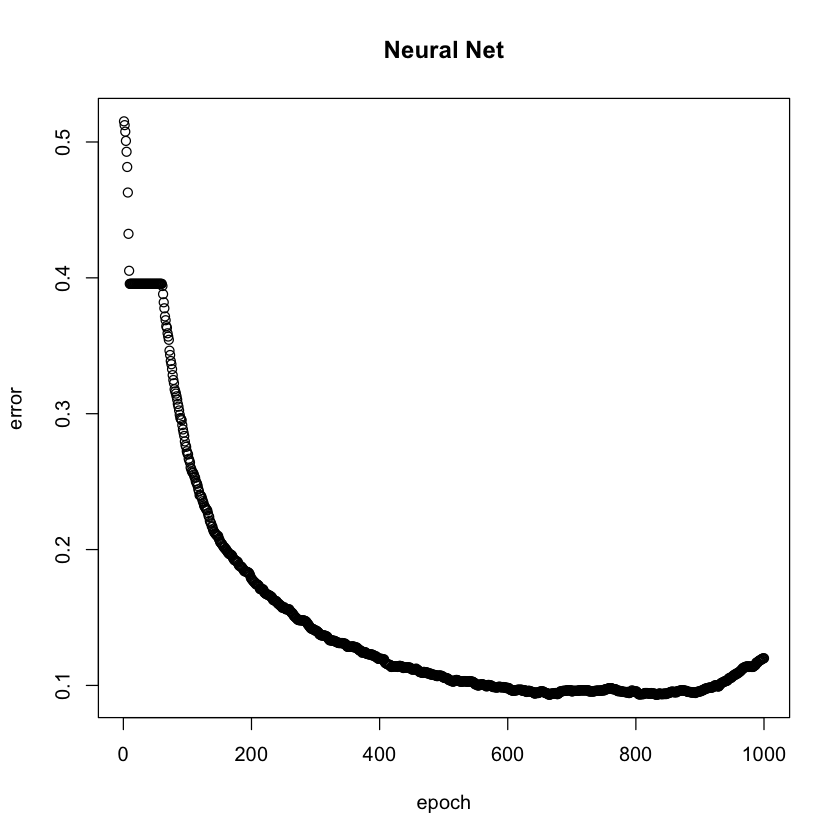

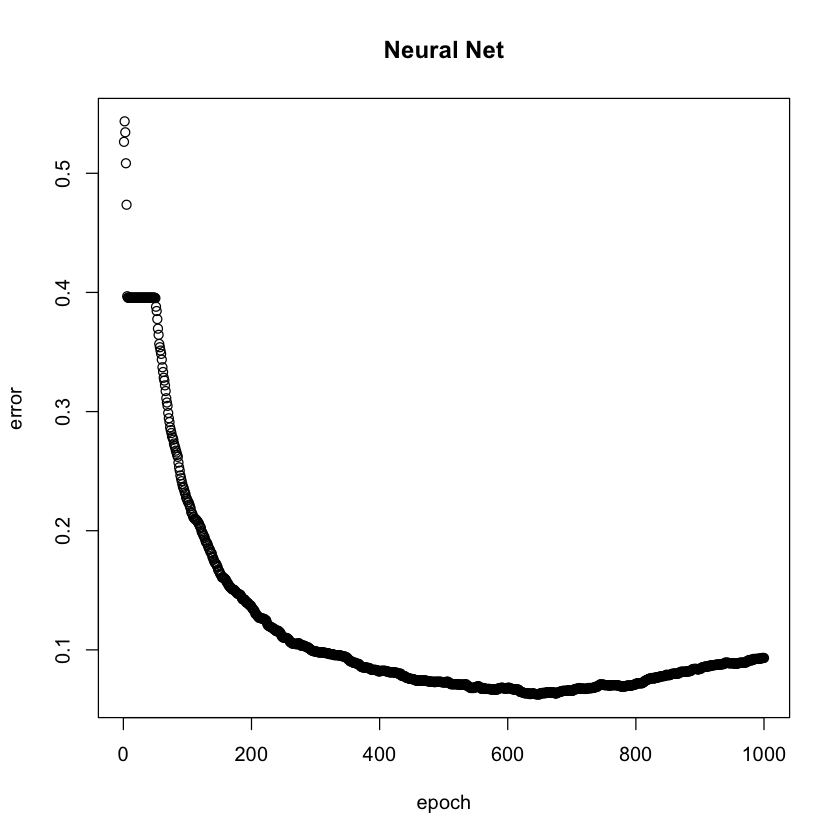

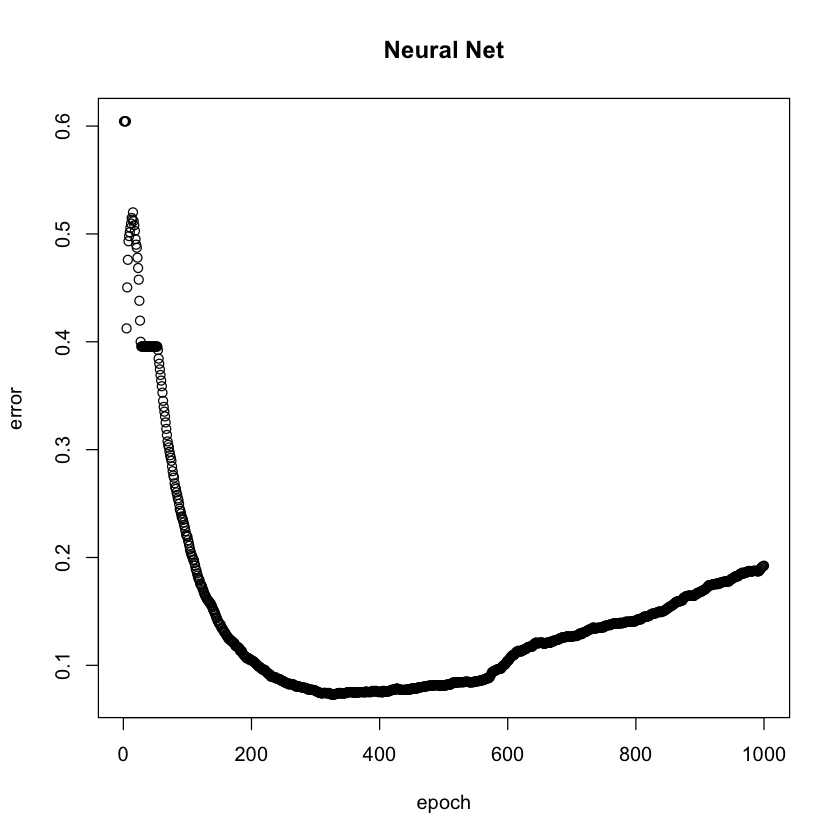

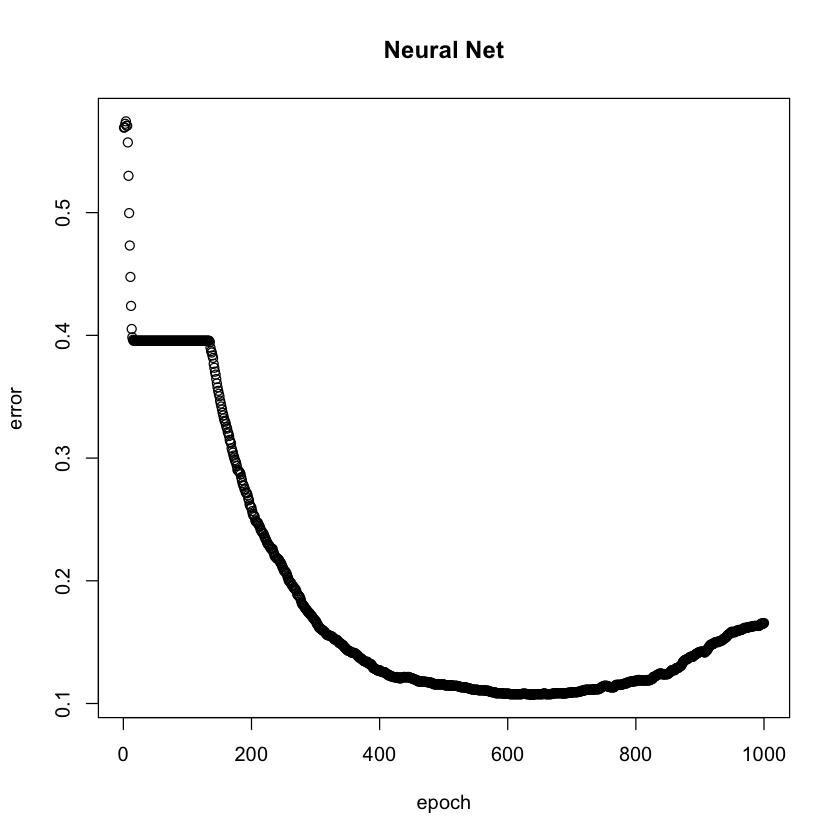

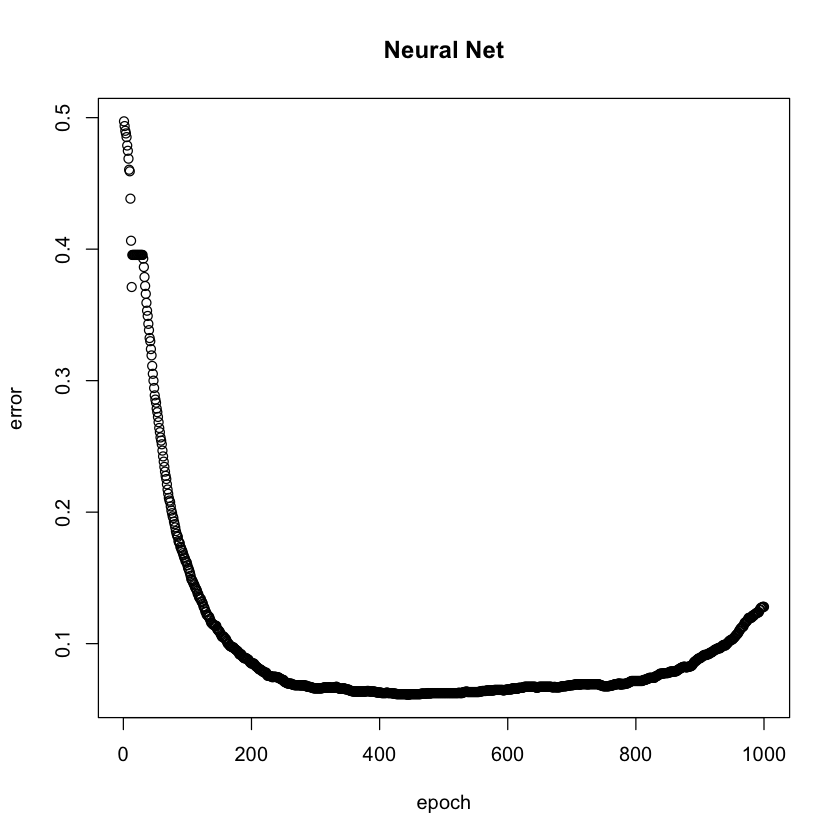

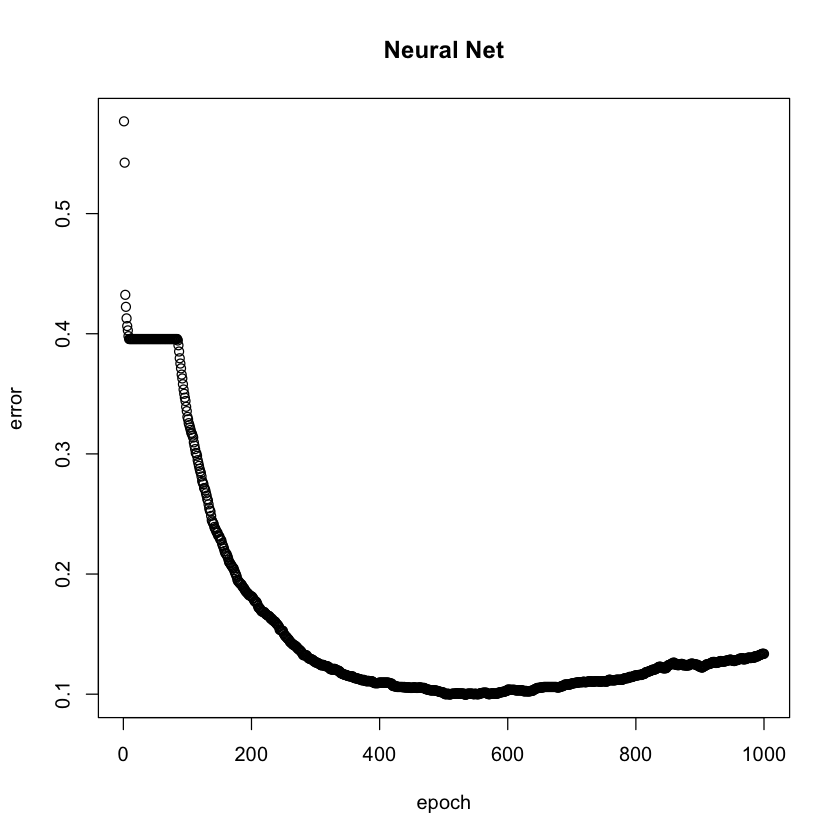

In [121]:
K <- seq(2, 100, 2)
error.v3 <- data.frame(K,train=rep(0, length(K)), test=rep(0, length(K)))
 
for (k in K) {
  list[W1, W2, b1, b2]<- nn.build(k, X1.t, T1, plotting=TRUE, epoch.max=1000, eta = 0.1, lambda = 0.01)
    #Record the test errors for plotting purposes (TO BE COMPLETE)
    error.v3[error.v3$K==k, 'train'] <- error.rate(nn.predict(X1.t, W1, W2, b1, b2), T1)
    error.v3[error.v3$K==k, 'test'] <- error.rate(nn.predict(X2.t, W1, W2, b1, b2), T2)
}

### Record the test errors and Plotting the error

In [122]:
error.v3

K   train  test  
1    2 0.3956 0.3908
2    4 0.4148 0.4100
3    6 0.3956 0.3908
4    8 0.2024 0.1976
5   10 0.2872 0.2876
6   12 0.2600 0.2688
7   14 0.3956 0.3908
8   16 0.2784 0.2844
9   18 0.3156 0.3148
10  20 0.2596 0.2712
11  22 0.2176 0.2220
12  24 0.2660 0.2756
13  26 0.2148 0.2244
14  28 0.2800 0.2892
15  30 0.2176 0.2176
16  32 0.2248 0.2280
17  34 0.2264 0.2312
18  36 0.2456 0.2676
19  38 0.2056 0.2108
20  40 0.2680 0.2764
21  42 0.2396 0.2400
22  44 0.1396 0.1456
23  46 0.1960 0.1924
24  48 0.2324 0.2484
25  50 0.1464 0.1496
26  52 0.2260 0.2356
27  54 0.1900 0.1860
28  56 0.1500 0.1560
29  58 0.1400 0.1384
30  60 0.2304 0.2448
31  62 0.2992 0.2976
32  64 0.1316 0.1292
33  66 0.1932 0.1920
34  68 0.1536 0.1584
35  70 0.1796 0.1880
36  72 0.1476 0.1376
37  74 0.0780 0.0864
38  76 0.1176 0.1180
39  78 0.1588 0.1524
40  80 0.1416 0.1684
41  82 0.1860 0.1960
42  84 0.1736 0.1768
43  86 0.1524 0.1520
44  88 0.1580 0.1476
45  90 0.1200 0.1392
46  92 0.0932 0.0984
47  94 0.1924 0.2020
48  96 0.1656 0.1588
49  98 0.1280 0.1188
50 100 0.1336 0.1432

### Find the k with the lowest test error

In [203]:
## K with the lowest test error
error.v3$K[error.v3$test == min(error.v3$test)]

## Test error
error.v3$test[error.v3$K == 74]


[1] 74

[1] 0.0864

### Error rate for k with the lowest test error

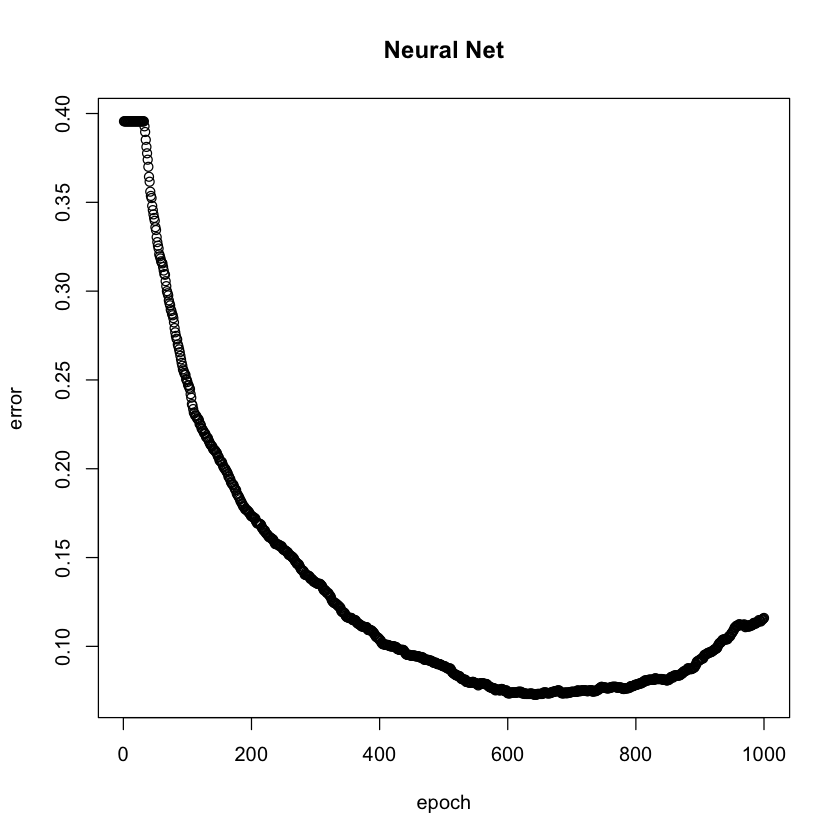

In [136]:
params <- nn.build(74, X1.t, T1, plotting=TRUE, epoch.max=1000, eta = 0.1, lambda = 0.01)


In [199]:
W1 <- params[[1]]
W2 <- params[[2]]
b1 <- params[[3]]
b2 <- params[[4]]

In [200]:
X2.t.df <- t(X2.t)

In [201]:
T2.predict <- nn.predict(X2.t,W1,W2,b1,b2,0)

### Plot Decision Boundary for NN with the lowest test error

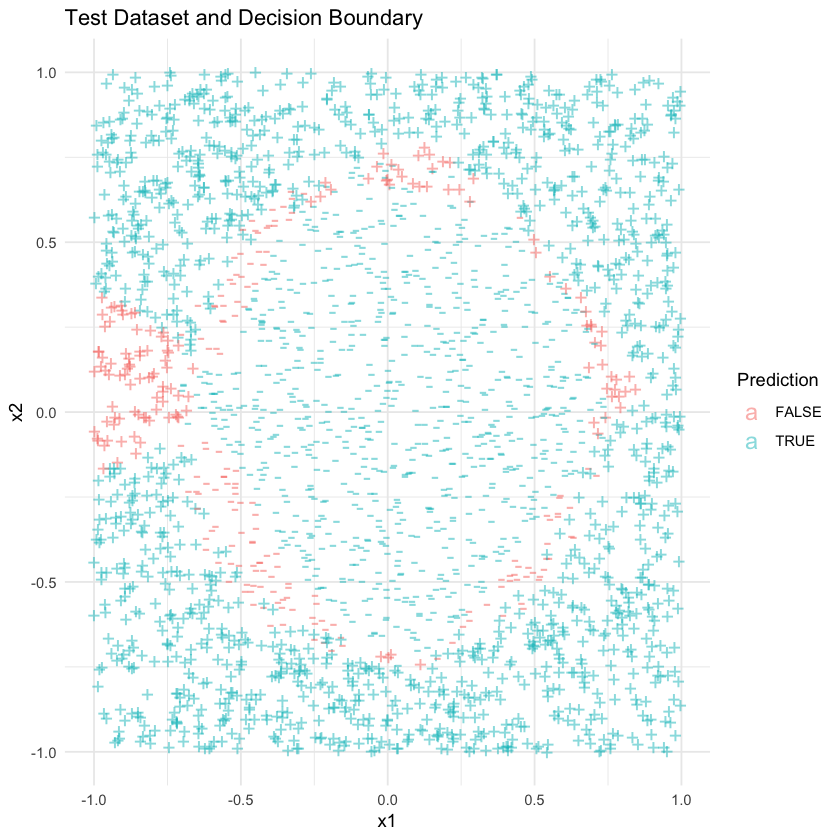

In [173]:
#nn.predict(X1, W1, W2, b1, b2)
ggplot(data=as.data.frame(X2.t.df), aes(x=x1, y=x2, label=ifelse(T2!=c1, '+', '-'),color=as.factor(T2==T2.predict))) + 
    geom_text(size = 5, alpha=0.5) +
    scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    ggtitle('Test Dataset and Decision Boundary') +
    theme_minimal()

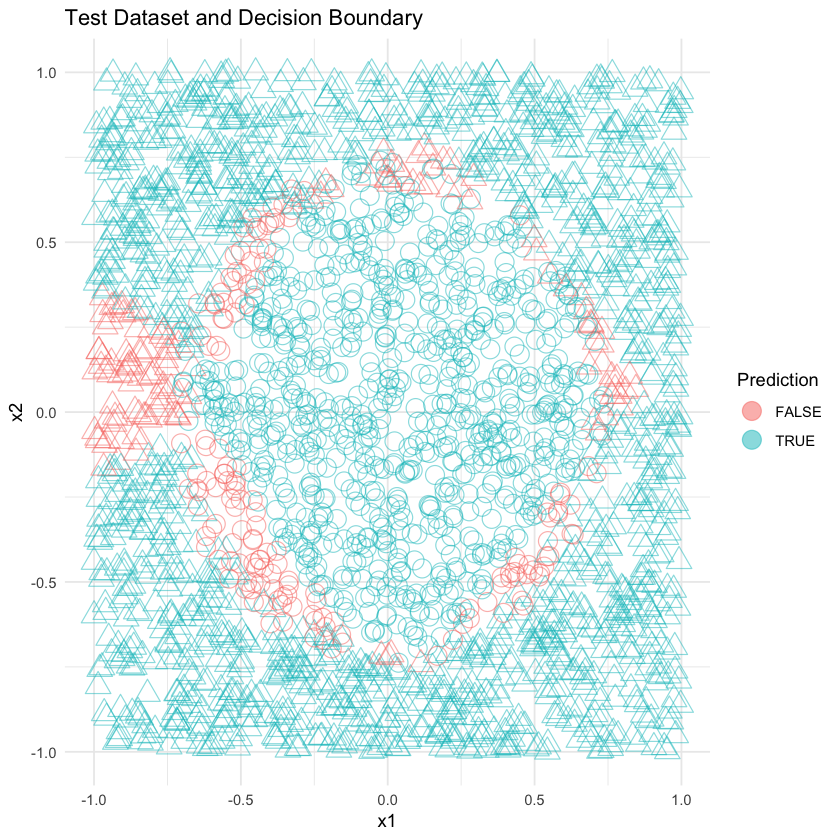

In [171]:
#nn.predict(X1, W1, W2, b1, b2)
ggplot(data=as.data.frame(X2.df), aes(x=x1, y=x2, label=ifelse(T2!=c1, '+', '-'),color=as.factor(T2==T2.predict))) + 
#     geom_text(size = 5, alpha=0.5) +
    geom_point (size = 5, alpha=0.5,shape=as.factor(T2))+
    scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    ggtitle('Test Dataset and Decision Boundary') +
    theme_minimal()